In [1]:
!pip install pandas
!pip install openpyxl
!pip install GDAL
!pip install geopandas
!pip install matplotlib
!pip install scipy
!pip install scikit-learn
!pip install nbformat --upgrade


  Using cached GDAL-3.7.2.tar.gz (777 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for GDAL
Failed to build GDAL


  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [117 lines of output]
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-cpython-311
  creating build\lib.win-amd64-cpython-311\osgeo
  copying osgeo\gdal.py -> build\lib.win-amd64-cpython-311\osgeo
  copying osgeo\gdalconst.py -> build\lib.win-amd64-cpython-311\osgeo
  copying osgeo\gdalnumeric.py -> build\lib.win-amd64-cpython-311\osgeo
  copying osgeo\gdal_array.py -> build\lib.win-amd64-cpython-311\osgeo
  copying osgeo\gnm.py -> build\lib.win-amd64-cpython-311\osgeo
  copying osgeo\ogr.py -> build\lib.win-amd64-cpython-311\osgeo
  copying osgeo\osr.py -> build\lib.win-amd64-cpython-311\osgeo
  copying osgeo\__init__.py -> build\lib.win-amd64-cpython-311\osgeo
  creating build\lib.win-amd64-cpython-311\osgeo_utils
  copying gdal-utils\osgeo_utils\gdal2tiles.py -> build\lib.win-amd64-cpython-311\osgeo_utils
  copyi

In [2]:
!pip install plotly

In [3]:
import pandas as pd
import geopandas as gpd
import matplotlib as plt
import matplotlib.pyplot as plt
import scipy.stats as stats
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


In [4]:
df = pd.read_excel("C:\\Users\\lopes\\OneDrive\\Área de Trabalho\\Desafio\\MunicipioBrasil_20230102.xlsx")



In [5]:
df.head()

cod_mun                nom_mun  cod_regiao  cod_uf  qtd_dom  \
0  1100015  Alta Floresta D'Oeste           1      11   7443.0   
1  1100023              Ariquemes           1      11  27654.0   
2  1100031                 Cabixi           1      11   1979.0   
3  1100049                 Cacoal           1      11  24413.0   
4  1100056             Cerejeiras           1      11   5399.0   

   qtd_dom_pobres  qtd_dom_vulneraveis  qtd_dom_pob_vul  qtd_pes  \
0     4815.110866          1378.041441      6193.152307  24392.0   
1    11601.470928          6327.880993     17929.351921  90353.0   
2     1280.951291           468.406271      1749.357562   6313.0   
3     6993.735293          3929.625264     10923.360558  78574.0   
4     2982.974817          1054.726046      4037.700863  17029.0   

   qtd_pes_pobres  ...  contr_T2   contr_T3   contr_P1  contr_P2   contr_P3  \
0    17426.222018  ...  1.458822  10.331535  12.250263  3.101195  13.260453   
1    44172.856817  ...  1.979498  13.575718  10.907053  4.653805  12.506057   
2     4459.568118  ...  0.796450  11.166553  11.696466  2.517816  14.098967   
3    26757.319951  ...  2.212722  11.999772  10.875981  3.901138  11.589410   
4    10345.154932  ...  2.101833  12.350372  13.383966  2.437176  13.601732   

   contr_P4  num_idhm  num_ivs  num_ibeu   num_renda  
0  3.487523     0.641    0.376     0.625  548.809498  
1  2.015588     0.702    0.268     0.709  762.672776  
2  2.134615     0.650    0.300     0.665  523.394761  
3  3.029373     0.718    0.255     0.776  825.929402  
4  2.080656     0.692    0.280     0.674  629.383679  

[5 rows x 54 columns]

In [6]:
# Calcular a média do IPM agrupando apenas por cod-regiao
average_ipm_region = df.groupby(['cod_regiao'])['IPM'].mean().reset_index()

# Renomear as colunas para melhor entendimento
average_ipm_region.columns = ['Código da Região', 'Média do IPM']

average_ipm_region


Código da Região  Média do IPM
0                 1     25.975933
1                 2     18.660030
2                 3      7.603099
3                 4     11.803972
4                 5     11.906970

In [7]:
# Calcular a média do IPM agrupando apenas por cod-uf
average_ipm_uf = df.groupby(['cod_uf'])['IPM'].mean().reset_index()

# Renomear as colunas para melhor entendimento
average_ipm_uf.columns = ['Código da UF', 'Média do IPM']

average_ipm_uf

Código da UF  Média do IPM
0             11     27.290824
1             12     30.233346
2             13     33.830987
3             14     25.821623
4             15     30.810933
5             16     25.623480
6             17     16.389590
7             21     26.382194
8             22     21.349791
9             23     18.380941
10            24     14.369320
11            25     18.156256
12            26     15.929212
13            27     19.270943
14            28     15.510055
15            29     16.936201
16            31     10.433668
17            32     11.201550
18            33      5.878514
19            35      3.670553
20            41     11.922860
21            42     12.504304
22            43     11.294629
23            50     12.554742
24            51     15.272959
25            52      9.813023
26            53      1.887254

In [8]:
municipios_shape = gpd.read_file(r"C:\Users\lopes\OneDrive\Área de Trabalho\Desafio\Shapefiles\BR_Municipios_2022.shp")

# Converter a coluna "CD_MUN" para int64
municipios_shape["CD_MUN"] = municipios_shape["CD_MUN"].astype(int)

#realizar junção
merged_data = municipios_shape.merge(df, left_on="CD_MUN", right_on="cod_mun", how="left")

# Exibir as primeiras linhas dos dados unidos
merged_data.head()

CD_MUN                 NM_MUN SIGLA_UF  AREA_KM2  \
0  1100015  Alta Floresta D'Oeste       RO  7067.127   
1  1100023              Ariquemes       RO  4426.571   
2  1100031                 Cabixi       RO  1314.352   
3  1100049                 Cacoal       RO  3793.000   
4  1100056             Cerejeiras       RO  2783.300   

                                            geometry    cod_mun  \
0  POLYGON ((-62.00806 -12.13379, -62.00784 -12.2...  1100015.0   
1  POLYGON ((-63.17933 -10.13924, -63.17746 -10.1...  1100023.0   
2  POLYGON ((-60.52408 -13.32137, -60.37162 -13.3...  1100031.0   
3  POLYGON ((-61.35502 -11.50452, -61.35524 -11.5...  1100049.0   
4  POLYGON ((-60.82135 -13.11910, -60.81773 -13.1...  1100056.0   

                 nom_mun  cod_regiao  cod_uf  qtd_dom  ...  contr_T2  \
0  Alta Floresta D'Oeste         1.0    11.0   7443.0  ...  1.458822   
1              Ariquemes         1.0    11.0  27654.0  ...  1.979498   
2                 Cabixi         1.0    11.0   1979.0  ...  0.796450   
3                 Cacoal         1.0    11.0  24413.0  ...  2.212722   
4             Cerejeiras         1.0    11.0   5399.0  ...  2.101833   

    contr_T3   contr_P1  contr_P2   contr_P3  contr_P4  num_idhm  num_ivs  \
0  10.331535  12.250263  3.101195  13.260453  3.487523     0.641    0.376   
1  13.575718  10.907053  4.653805  12.506057  2.015588     0.702    0.268   
2  11.166553  11.696466  2.517816  14.098967  2.134615     0.650    0.300   
3  11.999772  10.875981  3.901138  11.589410  3.029373     0.718    0.255   
4  12.350372  13.383966  2.437176  13.601732  2.080656     0.692    0.280   

   num_ibeu   num_renda  
0     0.625  548.809498  
1     0.709  762.672776  
2     0.665  523.394761  
3     0.776  825.929402  
4     0.674  629.383679  

[5 rows x 59 columns]

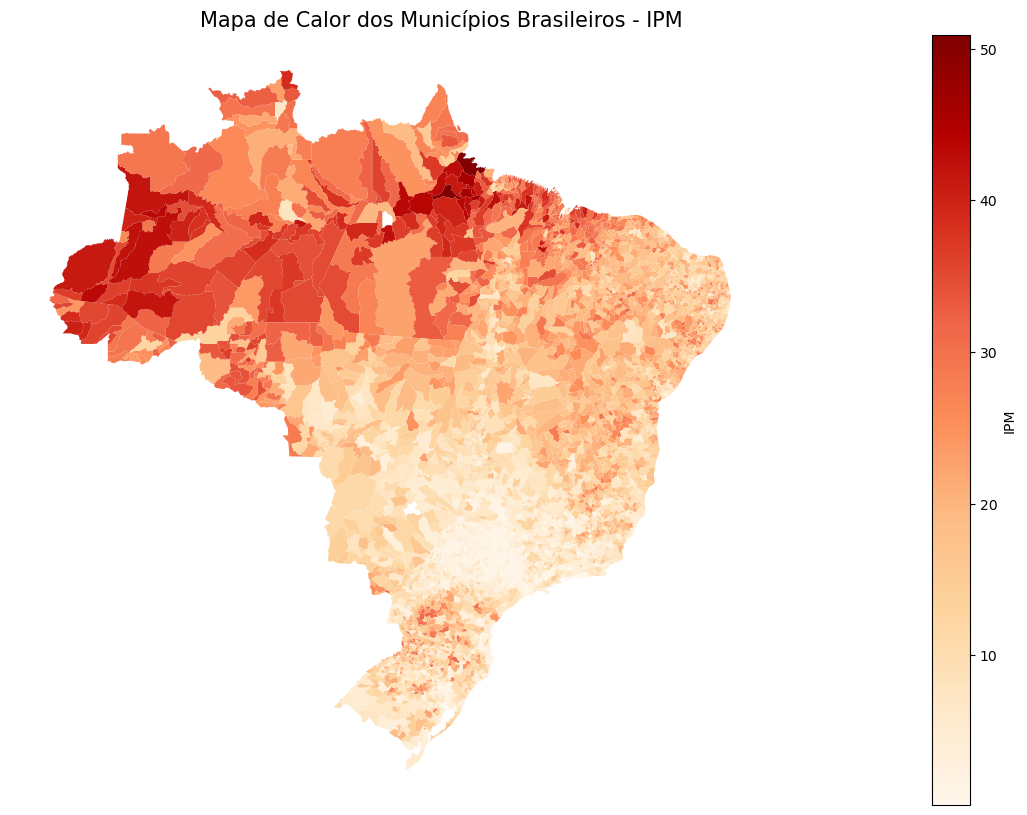

In [9]:
import matplotlib.pyplot as plt

# Definir tamanho da figura
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Plotar o mapa de calor
merged_data.plot(column="IPM", ax=ax, legend=True, cmap="OrRd", legend_kwds={'label': "IPM"})

# Definir título e remover os eixos
ax.set_title("Mapa de Calor dos Municípios Brasileiros - IPM", fontdict={'fontsize': '15', 'fontweight' : '3'})
ax.axis('off')

plt.savefig("municipios_brasileiros.png")

plt.show()



In [10]:
# Filtrando o dataframe para incluir apenas os municípios de Minas Gerais (cod_uf = 31)
df_mg = df[df['cod_uf'] == 31]

# Exibindo as primeiras linhas do dataframe filtrado
df_mg.head()

cod_mun              nom_mun  cod_regiao  cod_uf  qtd_dom  \
2243  3100104  Abadia dos Dourados           3      31   2340.0   
2244  3100203               Abaeté           3      31   7862.0   
2245  3100302           Abre Campo           3      31   4102.0   
2246  3100401              Acaiaca           3      31   1265.0   
2247  3100500              Açucena           3      31   3061.0   

      qtd_dom_pobres  qtd_dom_vulneraveis  qtd_dom_pob_vul  qtd_pes  \
2243      773.360319           199.650097       973.010416   6704.0   
2244      931.555464           797.547866      1729.103330  22690.0   
2245     1672.267505           362.911399      2035.178905  13311.0   
2246      328.549840           148.866919       477.416759   3920.0   
2247     1358.439555           747.134612      2105.574167  10276.0   

      qtd_pes_pobres  ...  contr_T2   contr_T3  contr_P1  contr_P2   contr_P3  \
2243     2370.462184  ...  0.682330  16.695981  0.264946  1.241982  14.514304   
2244     3102.546895  ...  0.784580  11.189114  0.431645  2.629879  14.878377   
2245     6298.586162  ...  0.593056  13.168721  0.782967  1.878917  14.798105   
2246     1258.028328  ...  4.973471  12.439548  0.000000  2.551247  14.998666   
2247     5410.159467  ...  1.176009  10.132582  2.113764  2.962846  14.371046   

      contr_P4  num_idhm  num_ivs  num_ibeu   num_renda  
2243  0.688459     0.689    0.232     0.883  646.813132  
2244  0.337808     0.698    0.290     0.862  853.887258  
2245  3.626763     0.654    0.282     0.820  510.582365  
2246  3.694008     0.630    0.335     0.889  411.514006  
2247  4.047744     0.610    0.571     0.733  385.290675  

[5 rows x 54 columns]

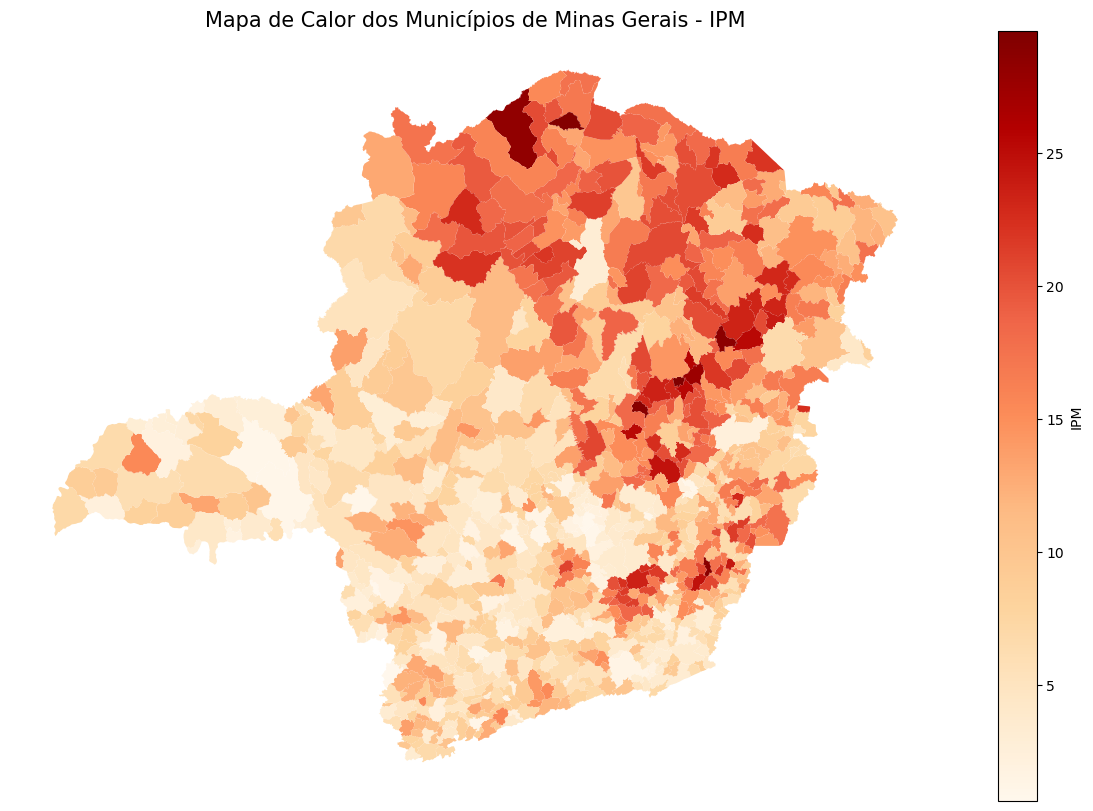

In [11]:
# Filtrar apenas municípios de Minas Gerais
merged_data_mg = merged_data[merged_data['cod_uf'] == 31]

# Definir tamanho da figura
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Plotar o mapa de calor para Minas Gerais
merged_data_mg.plot(column="IPM", ax=ax, legend=True, cmap="OrRd", legend_kwds={'label': "IPM"})

# Definir título e remover os eixos
ax.set_title("Mapa de Calor dos Municípios de Minas Gerais - IPM", fontdict={'fontsize': '15', 'fontweight' : '3'})
ax.axis('off')

plt.savefig("municipios_mineiros.png")

plt.show()


In [12]:
dados_raca = pd.read_excel("C:\\Users\\lopes\\OneDrive\\Área de Trabalho\\Desafio\\MUNIC_IPMporRaca_20230403.xlsx")

# Exibir as primeiras linhas do novo conjunto de dados
dados_raca.head()

cod_mun  raca   qtd_pessoas  qtd_pes_pobres  qtd_pes_vulneraveis  \
0  1100015     1  10583.324108     7179.226549          1992.031046   
1  1100015     2   1094.001805      728.312925           179.740507   
2  1100015     3     95.704395       83.408552             0.000000   
3  1100015     4  12122.249467     8958.390641          1716.999407   
4  1100015     5    496.720225      476.883350            19.836875   

   qtd_pes_pob_vul     qtd_0a11  qtd_0a11_pobres  qtd_0a11_vulneraveis  \
0      9171.257595  2089.762631      1410.233307            471.061836   
1       908.053431   144.272802       123.646674             10.421011   
2        83.408552     0.000000         0.000000              0.000000   
3     10675.390048  2567.713721      2036.730931            304.591940   
4       496.720225   142.410552       132.492114              9.918438   

   qtd_0a11_pob_vul  ...   contr_S2   contr_S3   contr_S4  contr_T1  contr_T2  \
0       1881.295142  ...  12.762635  13.858319   8.597698  1.144931  1.539685   
1        134.067685  ...  12.947788  13.623035   6.918102  0.978327  1.533518   
2          0.000000  ...  12.885652  14.817844  10.044992         0         0   
3       2341.322871  ...  12.224243  13.412923   7.570065  1.179069  1.672537   
4        142.410552  ...  10.780475  11.987448   9.833673         0    0.4005   

    contr_T3   contr_P1  contr_P2   contr_P3  contr_P4  
0  10.312575  12.087016  2.793707  12.398213  3.542948  
1   9.469442  12.145569  6.469673  12.160457  2.474366  
2     11.518  12.748534  6.175887  14.817844         0  
3  10.139405   11.58104  4.775916  13.261225  3.619611  
4   4.673202  11.336937  9.354406  12.245565  3.201294  

[5 rows x 41 columns]

In [13]:
# Filtrando o dataframe dados_raca usando a lista de cod_mun de df_mg
dados_raca = dados_raca[dados_raca['cod_mun'].isin(df_mg['cod_mun'])]

# Exibindo as primeiras linhas do dataframe filtrado
dados_raca.head()

cod_mun  raca  qtd_pessoas  qtd_pes_pobres  qtd_pes_vulneraveis  \
10254  3100104     1  4663.439195     1760.620289           366.147557   
10255  3100104     2   260.379148       35.198184            28.742196   
10256  3100104     3    37.682769        2.796377             9.010561   
10257  3100104     4  1739.801559      571.847335           201.572928   
10258  3100104     5     2.697328        0.000000             0.000000   

       qtd_pes_pob_vul    qtd_0a11  qtd_0a11_pobres  qtd_0a11_vulneraveis  \
10254      2126.767846  751.482520       285.042702             61.250367   
10255        63.940380   20.576895         0.000000              0.000000   
10256        11.806938    0.000000         0.000000              0.000000   
10257       773.420262  289.611243        85.568078             51.104586   
10258         0.000000    0.000000         0.000000              0.000000   

       qtd_0a11_pob_vul  ...   contr_S2   contr_S3   contr_S4   contr_T1  \
10254        346.293069  ...  14.684864  15.026551  14.583182   1.896124   
10255          0.000000  ...  10.041458  10.041458  15.111031          0   
10256          0.000000  ...  12.502501  12.502501  12.502501  16.663333   
10257        136.672665  ...  13.630486  14.868234  13.802638    0.81437   
10258          0.000000  ...                                               

       contr_T2   contr_T3  contr_P1  contr_P2   contr_P3  contr_P4  
10254  0.697807  17.303187  0.142281  1.183884  14.162624  0.825017  
10255   1.75275  11.598338         0  6.384661  15.111031  1.315089  
10256         0  16.663333         0         0  12.502501         0  
10257  0.875625  15.333667  0.506962  2.595147  13.915078  0.613441  
10258                                                                

[5 rows x 41 columns]

In [14]:
raca_map = {
    1: "Branca",
    2: "Preta",
    3: "Amarela",
    4: "Parda",
    5: "Indígena"
}

# Atualizar a coluna "raca"
dados_raca['raca'] = dados_raca['raca'].map(raca_map)

# Remover os dados com valor 9 (não existe no conjunto de dados atual, mas vamos garantir que seja removido se estiver presente)
dados_raca = dados_raca[dados_raca['raca'].notnull()]

# Agrupar os dados novamente
grouped_data = dados_raca.groupby('raca').agg({
    'qtd_pes_pob_vul': 'sum',
    'qtd_pessoas': 'sum'
}).reset_index()

In [15]:
# Calcular a proporção de pessoas pobres ou vulneráveis à pobreza para cada raça
dados_raca['proporcao_pob_vul'] = dados_raca['qtd_pes_pob_vul'] / dados_raca['qtd_pessoas']

# Agrupar os dados por raça e calcular a média da proporção
proporcao_media_por_raca = dados_raca.groupby('raca')['proporcao_pob_vul'].mean()

proporcao_media_por_raca

# Transformar a série 'proporcao_media_por_raca' em um DataFrame
tabela_proporcao_media = proporcao_media_por_raca.reset_index()
tabela_proporcao_media.columns = ['Raça', 'Proporção Média de Pobres/Vulneráveis']
tabela_proporcao_media


Raça  Proporção Média de Pobres/Vulneráveis
0   Amarela                               0.409411
1    Branca                               0.407832
2  Indígena                               0.362828
3     Parda                               0.484149
4     Preta                               0.490043

C:\Users\lopes\AppData\Local\Temp\ipykernel_8444\1988628905.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:.0f}%'.format(x*100) for x in ax.get_yticks()])  # Format y-axis to show percentages


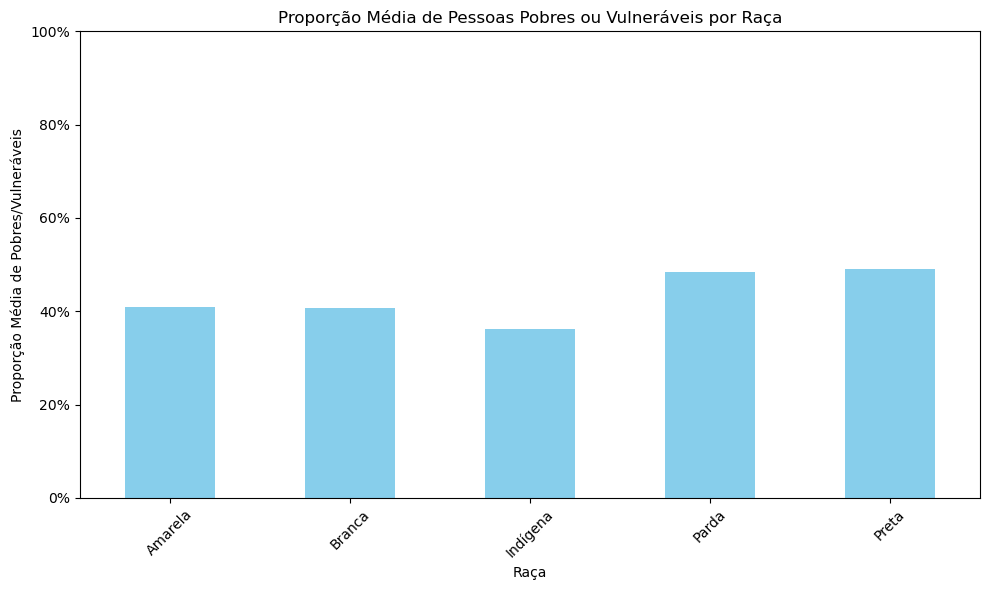

In [16]:
# Plotar o gráfico de barras com a proporção média
fig, ax = plt.subplots(figsize=(10, 6))
tabela_proporcao_media.plot(x='Raça', y='Proporção Média de Pobres/Vulneráveis', kind='bar', ax=ax, legend=False, color='skyblue')
ax.set_title("Proporção Média de Pessoas Pobres ou Vulneráveis por Raça")
ax.set_xlabel("Raça")
ax.set_ylabel("Proporção Média de Pobres/Vulneráveis")
ax.set_xticklabels(tabela_proporcao_media['Raça'], rotation=45)
ax.set_ylim(0, 1)
ax.set_yticklabels(['{:.0f}%'.format(x*100) for x in ax.get_yticks()])  # Format y-axis to show percentages

plt.tight_layout()

plt.savefig("proporcao_media_por_raca.png")
plt.show()







In [17]:
# Realizar a ANOVA
f_value, p_value = stats.f_oneway(
    dados_raca['proporcao_pob_vul'][dados_raca['raca'] == "Amarela"],
    dados_raca['proporcao_pob_vul'][dados_raca['raca'] == "Branca"],
    dados_raca['proporcao_pob_vul'][dados_raca['raca'] == "Indígena"],
    dados_raca['proporcao_pob_vul'][dados_raca['raca'] == "Parda"],
    dados_raca['proporcao_pob_vul'][dados_raca['raca'] == "Preta"]
)

f_value, p_value


(32.168776506746575, 2.1086012367827367e-26)

In [18]:
# Determinando os 20 municípios com maiores e menores IPM
top_20_municipios = df_mg.nlargest(20, 'IPM')['cod_mun']
bottom_20_municipios = df_mg.nsmallest(20, 'IPM')['cod_mun']

# Filtrando os dados de raça para estes municípios
dados_raca_top = dados_raca[dados_raca['cod_mun'].isin(top_20_municipios)]
dados_raca_bottom = dados_raca[dados_raca['cod_mun'].isin(bottom_20_municipios)]

# Calculando a proporção de cada raça para os municípios de maior IPM
proporcao_raca_top = dados_raca_top.groupby('raca').agg({
    'qtd_pessoas': 'sum'
})
proporcao_raca_top['proporcao'] = proporcao_raca_top['qtd_pessoas'] / proporcao_raca_top['qtd_pessoas'].sum()

# Calculando a proporção de cada raça para os municípios de menor IPM
proporcao_raca_bottom = dados_raca_bottom.groupby('raca').agg({
    'qtd_pessoas': 'sum'
})
proporcao_raca_bottom['proporcao'] = proporcao_raca_bottom['qtd_pessoas'] / proporcao_raca_bottom['qtd_pessoas'].sum()

proporcao_raca_top, proporcao_raca_bottom


(            qtd_pessoas  proporcao
 raca                              
 Amarela     1756.186492   0.008213
 Branca     44571.247203   0.208452
 Indígena    7967.791861   0.037264
 Parda     139027.051242   0.650206
 Preta      20497.723201   0.095864,
            qtd_pessoas  proporcao
 raca                             
 Amarela   5.845608e+04   0.010116
 Branca    2.908288e+06   0.503266
 Indígena  8.369567e+03   0.001448
 Parda     2.232988e+06   0.386408
 Preta     5.707299e+05   0.098762)

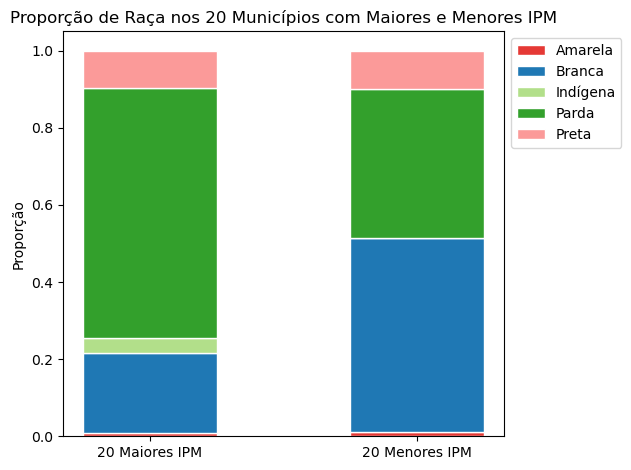

In [19]:
# Preparando os dados para o gráfico empilhado
labels = proporcao_raca_top.index.tolist()
top_values = proporcao_raca_top['proporcao'].tolist()
bottom_values = proporcao_raca_bottom['proporcao'].tolist()

# Definindo a largura das barras
barWidth = 0.5

# Definindo a posição das barras
r1 = [0]
r2 = [1]

# Criando as barras
plt.bar(r1, top_values[0], color='#E53935', edgecolor='white', width=barWidth, label=labels[0])
plt.bar(r2, bottom_values[0], color='#E53935', edgecolor='white', width=barWidth)

# Empilhando as outras barras
for i in range(1, len(labels)):
    plt.bar(r1, top_values[i], bottom=[sum(top_values[:i]) for _ in r1], color=plt.cm.Paired(i), edgecolor='white', width=barWidth, label=labels[i])
    plt.bar(r2, bottom_values[i], bottom=[sum(bottom_values[:i]) for _ in r2], color=plt.cm.Paired(i), edgecolor='white', width=barWidth)

# Adicionando os rótulos
plt.xticks([0, 1], ['20 Maiores IPM', '20 Menores IPM'])
plt.ylabel('Proporção')
plt.title('Proporção de Raça nos 20 Municípios com Maiores e Menores IPM')

# Adicionando a legenda e mostrando o gráfico
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
plt.tight_layout()
plt.show()

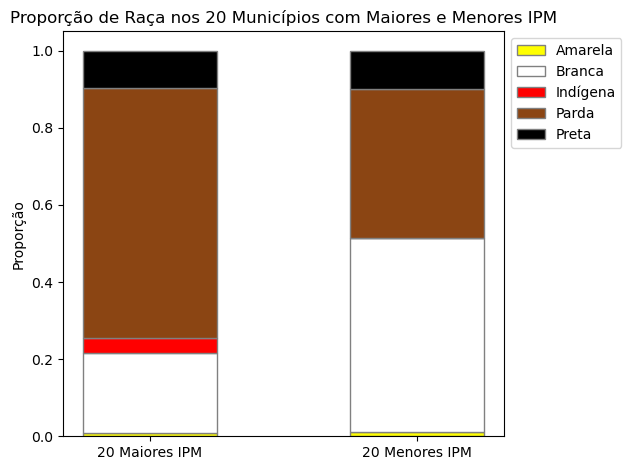

In [20]:
# Definindo as cores para cada raça
colors = {
    "Branca": "white",
    "Preta": "black",
    "Amarela": "yellow",
    "Parda": "saddlebrown",
    "Indígena": "red"
}

# Criando as barras com as cores definidas
plt.bar(r1, top_values[0], color=colors[labels[0]], edgecolor='gray', width=barWidth, label=labels[0])
plt.bar(r2, bottom_values[0], color=colors[labels[0]], edgecolor='gray', width=barWidth)

# Empilhando as outras barras com as cores definidas
for i in range(1, len(labels)):
    plt.bar(r1, top_values[i], bottom=[sum(top_values[:i]) for _ in r1], color=colors[labels[i]], edgecolor='gray', width=barWidth, label=labels[i])
    plt.bar(r2, bottom_values[i], bottom=[sum(bottom_values[:i]) for _ in r2], color=colors[labels[i]], edgecolor='gray', width=barWidth)

# Adicionando os rótulos
plt.xticks([0, 1], ['20 Maiores IPM', '20 Menores IPM'])
plt.ylabel('Proporção')
plt.title('Proporção de Raça nos 20 Municípios com Maiores e Menores IPM')

# Adicionando a legenda e mostrando o gráfico
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
plt.tight_layout()

plt.savefig("Proporção de Raça nos 20 Município com Maiores e Menores IPM.png")

plt.show()




In [21]:
# Carregando novamente os dados sobre sexo
dados_sexo = pd.read_excel("C:\\Users\\lopes\\OneDrive\\Área de Trabalho\\Desafio\\MUNIC_IPMporSexo_20230403.xlsx")

# Visualizando os primeiros registros
dados_sexo.head()

cod_mun  sexo  qtd_pessoas  qtd_pes_pobres  qtd_pes_vulneraveis  \
0  1100015     1      12656.0     9234.796745          1827.226063   
1  1100015     2      11736.0     8191.425273          2081.381772   
2  1100023     1      45543.0    22768.166964          9587.697225   
3  1100023     2      44810.0    21404.689853          9840.558146   
4  1100031     1       3266.0     2338.226108           621.726135   

   qtd_pes_pob_vul     qtd_0a11  qtd_0a11_pobres  qtd_0a11_vulneraveis  \
0     11062.022808  2433.533535      1860.242443            399.729591   
1     10272.807045  2510.626171      1842.860584            396.263633   
2     32355.864189  9692.395538      5233.270492           1990.912458   
3     31245.247999  9377.495945      5130.635087           1862.892035   
4      2959.952243   652.838209       485.784632            124.711486   

   qtd_0a11_pob_vul  ...   contr_S2   contr_S3  contr_S4  contr_T1  contr_T2  \
0       2259.972034  ...  12.186224  13.350275  8.338274  1.146971  1.603338   
1       2239.124216  ...  12.715127  13.813207  7.707203  1.075942  1.519637   
2       7224.182950  ...  12.375029  14.202430  4.376765  1.689845  1.934628   
3       6993.527122  ...  12.465686  14.414611  3.731456  1.467515  2.169754   
4        610.496118  ...  12.545406  13.882891  9.308115  1.433752  0.848650   

    contr_T3   contr_P1  contr_P2   contr_P3  contr_P4  
0   9.740038  11.719946  4.267716  12.640239  3.516577  
1  10.334652  11.911296  4.095393  13.067676  3.504908  
2  13.123479  10.218211  6.094876  11.852498  1.878370  
3  13.025817  10.492471  6.341750  11.964273  2.197333  
4  11.112694  11.359339  3.541772  13.488408  2.559800  

[5 rows x 41 columns]

In [22]:
# Filtrando o dataframe dados_sexo usando a lista de cod_mun de df_mg
dados_sexo = dados_sexo[dados_sexo['cod_mun'].isin(df_mg['cod_mun'])]

# Exibindo as primeiras linhas do dataframe filtrado
dados_sexo.head()

cod_mun  sexo  qtd_pessoas  qtd_pes_pobres  qtd_pes_vulneraveis  \
4486  3100104     1       3400.0     1289.739645           308.750064   
4487  3100104     2       3304.0     1080.722539           296.723178   
4488  3100203     1      11230.0     1683.375332          1381.642977   
4489  3100203     2      11460.0     1419.171563          1365.251501   
4490  3100302     1       6669.0     3287.711404           611.251043   

      qtd_pes_pob_vul     qtd_0a11  qtd_0a11_pobres  qtd_0a11_vulneraveis  \
4486      1598.489709   542.617932       203.317153             56.673430   
4487      1377.445717   519.052726       167.293627             55.681523   
4488      3065.018309  1885.537959       393.791092            326.481249   
4489      2784.423064  1778.971734       279.202033            274.442851   
4490      3898.962447  1178.558185       624.387902            138.315541   

      qtd_0a11_pob_vul  ...   contr_S2   contr_S3   contr_S4  contr_T1  \
4486        259.990584  ...  14.401343  14.888620  14.421149  1.757357   
4487        222.975150  ...  14.304146  14.934601  14.374051  1.472113   
4488        720.272341  ...  12.708865  14.605793  12.127222  2.118529   
4489        553.644883  ...  12.108661  14.643443  11.641413  2.228783   
4490        762.703443  ...  12.372543  13.091907  12.939901  1.411412   

      contr_T2   contr_T3  contr_P1  contr_P2   contr_P3  contr_P4  
4486  0.790804  16.683998  0.293948  1.536632  14.200739  0.748980  
4487  0.713305  16.809374  0.148541  1.678830  14.011411  0.817651  
4488  0.844956  11.993179  0.341274  3.835769  13.679595  0.658354  
4489  0.964902  12.323047  0.126858  4.357621  14.648238  0.142563  
4490  0.592064  13.302431  0.895383  2.735193  14.418627  3.768747  

[5 rows x 41 columns]

In [23]:
# Calcular a proporção de pessoas pobres ou vulneráveis à pobreza para cada sexo
dados_sexo['proporcao_pob_vul'] = dados_sexo['qtd_pes_pob_vul'] / dados_sexo['qtd_pessoas']

# Agrupar os dados por sexo e calcular a média da proporção
proporcao_media_por_sexo = dados_sexo.groupby('sexo')['proporcao_pob_vul'].mean()

# Renomeando os índices com base na informação fornecida
proporcao_media_por_sexo.index = ['Homem', 'Mulher']

proporcao_media_por_sexo

Homem     0.468074
Mulher    0.438395
Name: proporcao_pob_vul, dtype: float64

In [24]:
# Identificando os 50 municípios com os maiores e menores IPMs
top_20_ipm = dados_sexo.sort_values(by='IPM', ascending=False).drop_duplicates('cod_mun').head(20)
bottom_20_ipm = dados_sexo.sort_values(by='IPM').drop_duplicates('cod_mun').head(20)

# Calculando a proporção de cada sexo em relação à população total do município para os 50 municípios com os maiores e menores IPMs
populacao_total_municipio = dados_sexo.groupby('cod_mun')['qtd_pessoas'].sum()
dados_top_bottom_20 = dados_sexo[dados_sexo['cod_mun'].isin(top_20_ipm['cod_mun'].tolist() + bottom_20_ipm['cod_mun'].tolist())]

# Calculando a proporção por sexo usando .loc[] para evitar o aviso
dados_top_bottom_20.loc[:, 'proporcao_sexo'] = dados_top_bottom_20.apply(lambda row: row['qtd_pessoas'] / populacao_total_municipio[row['cod_mun']], axis=1)

# Recalculando a composição por sexo e a proporção de pessoas pobres e vulneráveis para os 100 municípios
composicao_sexo_20 = dados_top_bottom_20.pivot(index='cod_mun', columns='sexo', values='proporcao_sexo')
proporcao_pob_vul_20 = dados_top_bottom_20.groupby('cod_mun')['proporcao_pob_vul'].mean()
composicao_sexo_20.columns = ['Homem', 'Mulher']

# Merge dos resultados
merged_ipm = pd.concat([top_20_ipm[['cod_mun', 'IPM']], bottom_20_ipm[['cod_mun', 'IPM']]])
analise_top_bottom_20_sexo = pd.merge(composicao_sexo_20, proporcao_pob_vul_20, on='cod_mun').reset_index()
analise_top_bottom_20_sexo = pd.merge(analise_top_bottom_20_sexo, merged_ipm, on='cod_mun', how='left')

# Ordenando pelo IPM para separar os municípios com maiores e menores IPMs
analise_top_bottom_20_sexo = analise_top_bottom_20_sexo.sort_values(by='IPM', ascending=False)


C:\Users\lopes\AppData\Local\Temp\ipykernel_8444\3179660761.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_top_bottom_20.loc[:, 'proporcao_sexo'] = dados_top_bottom_20.apply(lambda row: row['qtd_pessoas'] / populacao_total_municipio[row['cod_mun']], axis=1)


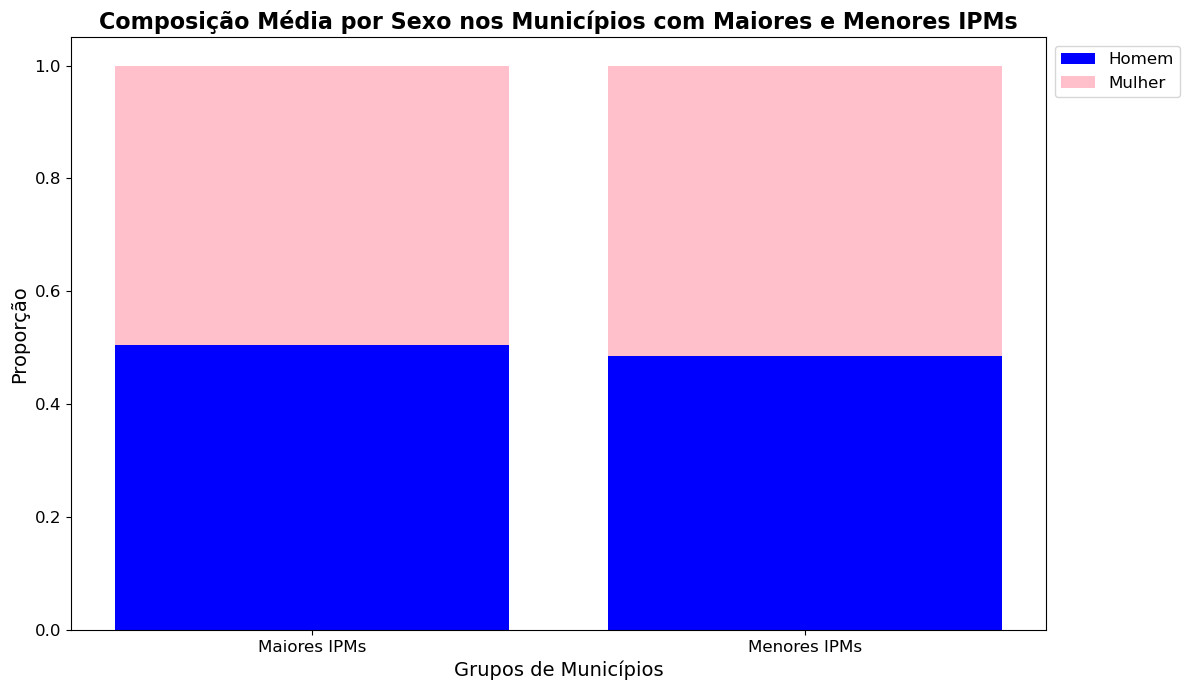

In [58]:
# Calculando a média da composição por sexo para os 50 municípios com os maiores e menores IPMs
media_sexo_top_20 = analise_top_bottom_20_sexo.head(20)[['Homem', 'Mulher']].mean()
media_sexo_bottom_20 = analise_top_bottom_20_sexo.tail(20)[['Homem', 'Mulher']].mean()

# Plotando o gráfico de barras empilhadas
fig, ax = plt.subplots(figsize=(12, 7))
bottom = [0, 0]
sexos = ['Homem', 'Mulher']
colors_sexo = ['blue', 'pink']

for i, sexo in enumerate(sexos):
    ax.bar('Maiores IPMs', media_sexo_top_20[sexo], bottom=bottom[0], color=colors_sexo[i], label=sexo)
    ax.bar('Menores IPMs', media_sexo_bottom_20[sexo], bottom=bottom[1], color=colors_sexo[i])
    bottom[0] += media_sexo_top_20[sexo]
    bottom[1] += media_sexo_bottom_20[sexo]

# Melhorando títulos, rótulos e legenda
ax.set_title('Composição Média por Sexo nos Municípios com Maiores e Menores IPMs', fontsize=16, fontweight='bold')
ax.set_ylabel('Proporção', fontsize=14)
ax.set_xlabel('Grupos de Municípios', fontsize=14)
ax.tick_params(axis='both', labelsize=12)
ax.legend(loc='upper left', bbox_to_anchor=(1,1), fontsize=12)

plt.tight_layout()

plt.savefig("Composição Média por Sexo nos Município com Maiores e Menores IPMs.png")

# Exibindo o gráfico
plt.show()


In [26]:
# Carregando os dados do arquivo Excel
dados_sexo_raca = pd.read_excel("C:\\Users\\lopes\\OneDrive\\Área de Trabalho\\Desafio\\MUNIC_IPMporSexoRaca_20230403.xlsx")

# Verificando as primeiras linhas do dataset
dados_sexo_raca.head()

cod_mun  sxraca   qtd_pessoas  qtd_pes_pobres  qtd_pes_vulneraveis  \
0  1100015       1   5399.820941     3744.708887           971.790297   
1  1100015       2   5183.503167     3434.517663          1020.240749   
2  1100015       3   6917.646546     5163.851188           855.435766   
3  1100015       4   6298.604725     4522.852378          1041.304147   
4  1100023       1  16072.748219     6733.824654          3369.778042   

   qtd_pes_pob_vul     qtd_0a11  qtd_0a11_pobres  qtd_0a11_vulneraveis  \
0      4716.499184  1107.500897       749.022378            270.117243   
1      4454.758412   982.261735       661.210929            200.944593   
2      6019.286954  1261.861919      1047.049346            129.612349   
3      5564.156526  1450.124604      1113.328260            185.400602   
4     10103.602695  3528.300235      1475.145063            808.247197   

   qtd_0a11_pob_vul  ...   contr_S2   contr_S3  contr_S4  contr_T1  contr_T2  \
0       1019.139620  ...  12.387976  13.698573  9.035484  1.266822  1.695697   
1        862.155522  ...  13.183654  14.037832  8.105742  1.007957   1.36437   
2       1176.661694  ...  12.137327  13.172079  7.675851  1.142963  1.652053   
3       1298.728862  ...  12.442277  13.727878  7.341542  1.188862  1.674043   
4       2283.392259  ...  12.784067  14.440014  4.484687   1.50056  2.084627   

    contr_T3   contr_P1  contr_P2   contr_P3  contr_P4  
0   9.797606  11.925765  2.947832  12.117023  3.603032  
1  10.891265  12.268219  2.620513  12.714196   3.47543  
2   9.996661   11.60715  4.903645    13.0406  3.492751  
3  10.198049  11.641533  4.899768   13.34135  3.583131  
4   13.79675   9.983389   5.87691  12.136693  1.890679  

[5 rows x 41 columns]

In [27]:
# Filtrando o dataframe dados_sexo usando a lista de cod_mun de df_mg
dados_sexo_raca = dados_sexo_raca[dados_sexo_raca['cod_mun'].isin(df_mg['cod_mun'])]

# Exibindo as primeiras linhas do dataframe filtrado
dados_sexo_raca.head()

cod_mun  sxraca  qtd_pessoas  qtd_pes_pobres  qtd_pes_vulneraveis  \
8972  3100104       1  2352.580680      950.342577           196.438827   
8973  3100104       2  2310.858515      810.277711           169.708730   
8974  3100104       3  1029.880193      336.600691           106.479634   
8975  3100104       4   970.300514      270.444828           123.835489   
8976  3100203       1  5778.552321      780.066136           501.565690   

      qtd_pes_pob_vul     qtd_0a11  qtd_0a11_pobres  qtd_0a11_vulneraveis  \
8972      1146.781405   401.001857       153.434450             31.445505   
8973       979.986441   350.480663       131.608252             29.804863   
8974       443.080325   141.616075        49.882703             25.227926   
8975       394.280317   168.572063        35.685375             25.876660   
8976      1281.631826  1006.991934       169.381551            109.049384   

      qtd_0a11_pob_vul  ...   contr_S2   contr_S3   contr_S4  contr_T1  \
8972        184.879954  ...  14.631816  15.004706  14.559405  2.022502   
8973        161.413115  ...  14.747398  15.052302  14.611211  1.747151   
8974         75.110629  ...  13.773622  14.586922  14.052488  0.862148   
8975         61.562035  ...  12.972342  14.580956  13.661474  0.645729   
8976        278.430935  ...  13.095607  14.744141  12.477505   1.20295   

      contr_T2   contr_T3  contr_P1  contr_P2   contr_P3  contr_P4  
8972  0.742981  17.243461  0.174901  1.217298  14.231781  0.747279  
8973  0.644556  17.373591   0.10383  1.144495  14.081102  0.916654  
8974  0.933054  15.113771  0.631096  2.448575    14.1308   0.76134  
8975  0.919871  15.114118   0.28288  3.284304  13.802015  0.520186  
8976  0.844629  12.365105  0.592698  3.342824  13.457531  0.138213  

[5 rows x 41 columns]

In [28]:
# Calculando a proporção de pessoas pobres ou vulneráveis para cada grupo de sexo e raça
dados_sexo_raca['proporcao_pob_vul'] = dados_sexo_raca['qtd_pes_pob_vul'] / dados_sexo_raca['qtd_pessoas']

# Agrupando os dados por sexo e raça e calculando a média da proporção
proporcao_media_por_sxraca = dados_sexo_raca.groupby('sxraca')['proporcao_pob_vul'].mean()

# Convertendo o resultado em um DataFrame para melhor visualização
proporcao_media_por_sxraca = proporcao_media_por_sxraca.reset_index()

# Renomeando as categorias para melhor interpretação
categorias = {
    1: "Homem branco",
    2: "Mulher branca",
    3: "Homem negro",
    4: "Mulher negra"
}
proporcao_media_por_sxraca['sxraca'] = proporcao_media_por_sxraca['sxraca'].map(categorias)

proporcao_media_por_sxraca


sxraca  proporcao_pob_vul
0   Homem branco           0.424580
1  Mulher branca           0.391172
2    Homem negro           0.497121
3   Mulher negra           0.475476

In [29]:
# Identificar os 20 municípios com os maiores e menores IPMs
top_20_ipm_sxraca = dados_sexo_raca.sort_values(by='IPM', ascending=False).drop_duplicates('cod_mun').head(20)
bottom_20_ipm_sxraca = dados_sexo_raca.sort_values(by='IPM').drop_duplicates('cod_mun').head(20)

# Calcular a proporção de cada grupo sxraca em relação à população total do município para os 40 municípios selecionados
populacao_total_municipio_sxraca = dados_sexo_raca.groupby('cod_mun')['qtd_pessoas'].sum()
dados_top_bottom_20_sxraca = dados_sexo_raca[dados_sexo_raca['cod_mun'].isin(top_20_ipm_sxraca['cod_mun'].tolist() + bottom_20_ipm_sxraca['cod_mun'].tolist())]

# Calculando a proporção por sxraca
dados_top_bottom_20_sxraca['proporcao_sxraca'] = dados_top_bottom_20_sxraca.apply(lambda row: row['qtd_pessoas'] / populacao_total_municipio_sxraca[row['cod_mun']], axis=1)

# Recalculando a composição por sxraca e a proporção de pessoas pobres e vulneráveis para os 40 municípios
composicao_sxraca_20 = dados_top_bottom_20_sxraca.pivot(index='cod_mun', columns='sxraca', values='proporcao_sxraca')

# Renomeando as colunas com as categorias correspondentes
categorias = {
    1: "Homem branco",
    2: "Mulher branca",
    3: "Homem negro",
    4: "Mulher negra"
}
composicao_sxraca_20.columns = [categorias[col] for col in composicao_sxraca_20.columns]

# Calculando as proporções médias para gráfico
maiores_ipms = composicao_sxraca_20.head(20).mean().values
menores_ipms = composicao_sxraca_20.tail(20).mean().values

maiores_ipms, menores_ipms



C:\Users\lopes\AppData\Local\Temp\ipykernel_8444\2396022469.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_top_bottom_20_sxraca['proporcao_sxraca'] = dados_top_bottom_20_sxraca.apply(lambda row: row['qtd_pessoas'] / populacao_total_municipio_sxraca[row['cod_mun']], axis=1)


(array([0.1870899 , 0.20016735, 0.30905927, 0.30368348]),
 array([0.17472833, 0.1871141 , 0.31975383, 0.31840374]))

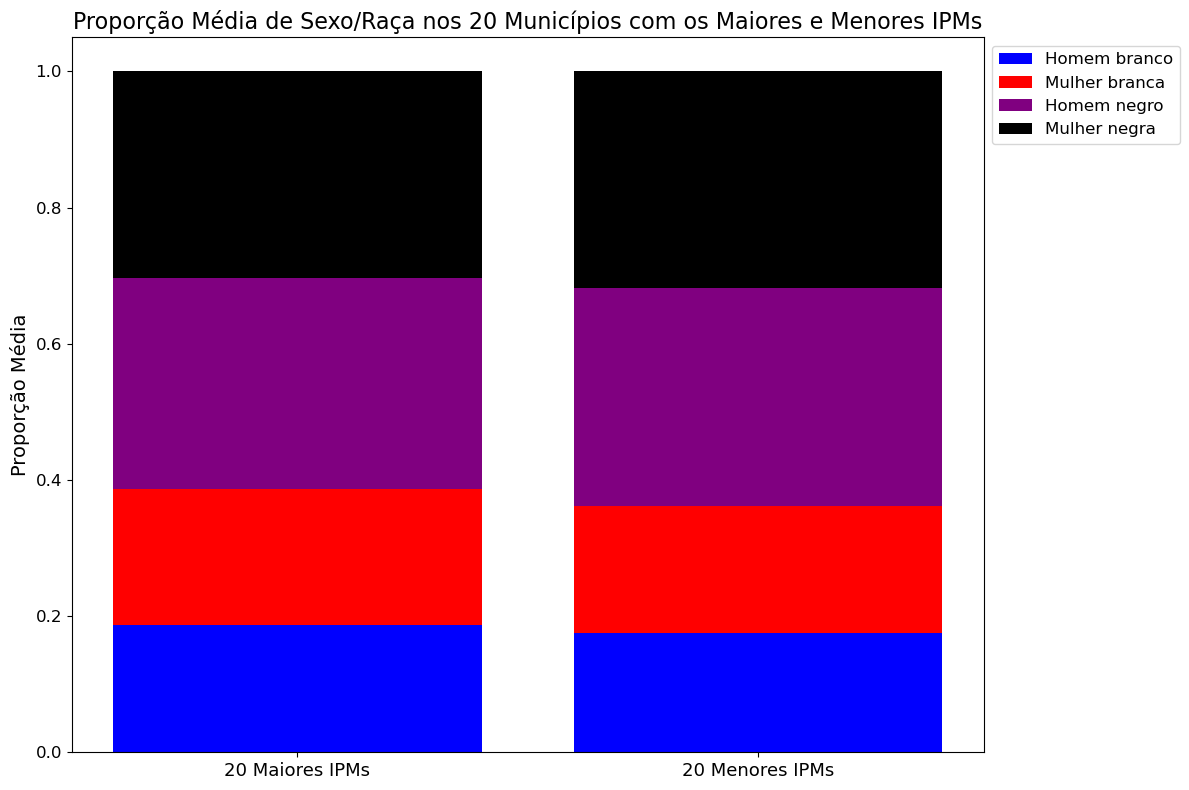

In [30]:
# Gráfico empilhado novamente
plt.figure(figsize=(12, 8))


# Definindo as cores
colors_intuitive = {
    "Homem branco": "blue",
    "Mulher branca": "red",
    "Homem negro": "purple",
    "Mulher negra": "black"
}


# Barra empilhada para 20 maiores IPMs
for i, label in enumerate(["Homem branco", "Mulher branca", "Homem negro", "Mulher negra"]):
    plt.bar("20 Maiores IPMs", maiores_ipms[i], color=colors_intuitive[label], 
            bottom=maiores_ipms[:i].sum() if i != 0 else 0, 
            label=label)

# Barra empilhada para 20 menores IPMs
for i, label in enumerate(["Homem branco", "Mulher branca", "Homem negro", "Mulher negra"]):
    plt.bar("20 Menores IPMs", menores_ipms[i], color=colors_intuitive[label], 
            bottom=menores_ipms[:i].sum() if i != 0 else 0)

# Títulos, legendas e labels
plt.title("Proporção Média de Sexo/Raça nos 20 Municípios com os Maiores e Menores IPMs", fontsize=16)
plt.ylabel("Proporção Média", fontsize=14)
plt.legend(loc="upper left", bbox_to_anchor=(1,1), fontsize=12)
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
plt.tight_layout()

plt.savefig("Proporção de Sexo Raça nos 20 Municípios com os Maiores e Menores IPMs.png")

plt.show()


In [31]:
# Filtrando para excluir a raça 9
dados_raca = dados_raca[dados_raca['raca'] != 9]

# Calculando a população total de cada município
populacao_total_municipio = dados_raca.groupby('cod_mun')['qtd_pessoas'].sum()

# Calculando a proporção de cada raça em relação à população total do município
dados_raca['proporcao_raca'] = dados_raca.apply(lambda row: row['qtd_pessoas'] / populacao_total_municipio[row['cod_mun']], axis=1)

# Criando o dataframe final com a proporção de cada raça por município
analise_por_raca = dados_raca.pivot(index='cod_mun', columns='raca', values='proporcao_raca').reset_index()

analise_por_raca.head()

raca  cod_mun   Amarela    Branca  Indígena     Parda     Preta
0     3100104  0.005621  0.695620  0.000402  0.259517  0.038839
1     3100203  0.007982  0.531779  0.000413  0.404026  0.055799
2     3100302  0.010770  0.424915       NaN  0.492941  0.071374
3     3100401  0.022643  0.184370       NaN  0.572570  0.220417
4     3100500  0.011050  0.192053       NaN  0.701802  0.095095

In [32]:
dados_municipio = df

# Calculando as somas das colunas para educacao, saude, trabalho e padrao_de_vida
dados_municipio['educacao'] = dados_municipio[['contr_E1', 'contr_E2', 'contr_E3']].sum(axis=1)
dados_municipio['saude'] = dados_municipio[['contr_S1', 'contr_S2', 'contr_S3', 'contr_S4']].sum(axis=1)
dados_municipio['trabalho'] = dados_municipio[['contr_T1', 'contr_T2', 'contr_T3']].sum(axis=1)
dados_municipio['padrao_de_vida'] = dados_municipio[['contr_P1', 'contr_P2', 'contr_P3', 'contr_P4']].sum(axis=1)

# Selecione as colunas necessárias
cols_to_merge = ['cod_mun', 'IPM', 'nom_mun', 'educacao', 'saude', 'trabalho', 'padrao_de_vida']

# Mesclando os dataframes
analise_por_raca = pd.merge(analise_por_raca, dados_municipio[cols_to_merge], on='cod_mun', how='left')

# Verificando o resultado
analise_por_raca.head()

cod_mun   Amarela    Branca  Indígena     Parda     Preta        IPM  \
0  3100104  0.005621  0.695620  0.000402  0.259517  0.038839  13.232134   
1  3100203  0.007982  0.531779  0.000413  0.404026  0.055799   4.478038   
2  3100302  0.010770  0.424915       NaN  0.492941  0.071374  17.030818   
3  3100401  0.022643  0.184370       NaN  0.572570  0.220417  10.319316   
4  3100500  0.011050  0.192053       NaN  0.701802  0.095095  18.218559   

               nom_mun   educacao      saude   trabalho  padrao_de_vida  
0  Abadia dos Dourados  20.019859  44.751988  18.518462       16.709691  
1               Abaeté  25.251300  42.695697  13.775294       18.277709  
2           Abre Campo  22.918314  40.998612  14.996322       21.086751  
3              Acaiaca  23.042678  37.874410  17.838991       21.243921  
4              Açucena  23.517726  39.579239  13.407635       23.495400

In [33]:
analise_por_raca.columns


Index(['cod_mun', 'Amarela', 'Branca', 'Indígena', 'Parda', 'Preta', 'IPM',
       'nom_mun', 'educacao', 'saude', 'trabalho', 'padrao_de_vida'],
      dtype='object')

In [34]:
# Criando a coluna preta_parda somando as colunas Preta e Parda
analise_por_raca['preta_parda'] = analise_por_raca['Preta'] + analise_por_raca['Parda']

# Removendo as colunas Preta e Parda
analise_por_raca.drop(columns=['Preta', 'Parda'], inplace=True)

# Reordenando as colunas
cols_order = ['cod_mun', 'nom_mun', 'Branca', 'Indígena', 'Amarela', 'preta_parda', 'educacao', 'saude', 'trabalho', 'padrao_de_vida', 'IPM']
analise_por_raca = analise_por_raca[cols_order]

# Exibindo as primeiras linhas do dataframe corrigido
analise_por_raca.head()



cod_mun              nom_mun    Branca  Indígena   Amarela  preta_parda  \
0  3100104  Abadia dos Dourados  0.695620  0.000402  0.005621     0.298356   
1  3100203               Abaeté  0.531779  0.000413  0.007982     0.459826   
2  3100302           Abre Campo  0.424915       NaN  0.010770     0.564315   
3  3100401              Acaiaca  0.184370       NaN  0.022643     0.792987   
4  3100500              Açucena  0.192053       NaN  0.011050     0.796897   

    educacao      saude   trabalho  padrao_de_vida        IPM  
0  20.019859  44.751988  18.518462       16.709691  13.232134  
1  25.251300  42.695697  13.775294       18.277709   4.478038  
2  22.918314  40.998612  14.996322       21.086751  17.030818  
3  23.042678  37.874410  17.838991       21.243921  10.319316  
4  23.517726  39.579239  13.407635       23.495400  18.218559

In [35]:
# Preenchendo os valores NaN da coluna 'indigena' com zero
colunas_racas = ["Branca", "Amarela", "Indígena", "preta_parda"]
for col in colunas_racas:
    analise_por_raca[col].fillna(0, inplace=True)

# Exibindo os primeiros registros
analise_por_raca.head()



cod_mun              nom_mun    Branca  Indígena   Amarela  preta_parda  \
0  3100104  Abadia dos Dourados  0.695620  0.000402  0.005621     0.298356   
1  3100203               Abaeté  0.531779  0.000413  0.007982     0.459826   
2  3100302           Abre Campo  0.424915  0.000000  0.010770     0.564315   
3  3100401              Acaiaca  0.184370  0.000000  0.022643     0.792987   
4  3100500              Açucena  0.192053  0.000000  0.011050     0.796897   

    educacao      saude   trabalho  padrao_de_vida        IPM  
0  20.019859  44.751988  18.518462       16.709691  13.232134  
1  25.251300  42.695697  13.775294       18.277709   4.478038  
2  22.918314  40.998612  14.996322       21.086751  17.030818  
3  23.042678  37.874410  17.838991       21.243921  10.319316  
4  23.517726  39.579239  13.407635       23.495400  18.218559

In [36]:
# Salvando o dataframe em uma planilha Excel
analise_por_raca.to_excel("analise_por_raca.xlsx", index=False)


In [37]:
nan_data = analise_por_raca[["preta_parda", "educacao", "IPM"]].isna().any()
print(nan_data)

preta_parda    False
educacao       False
IPM            False
dtype: bool


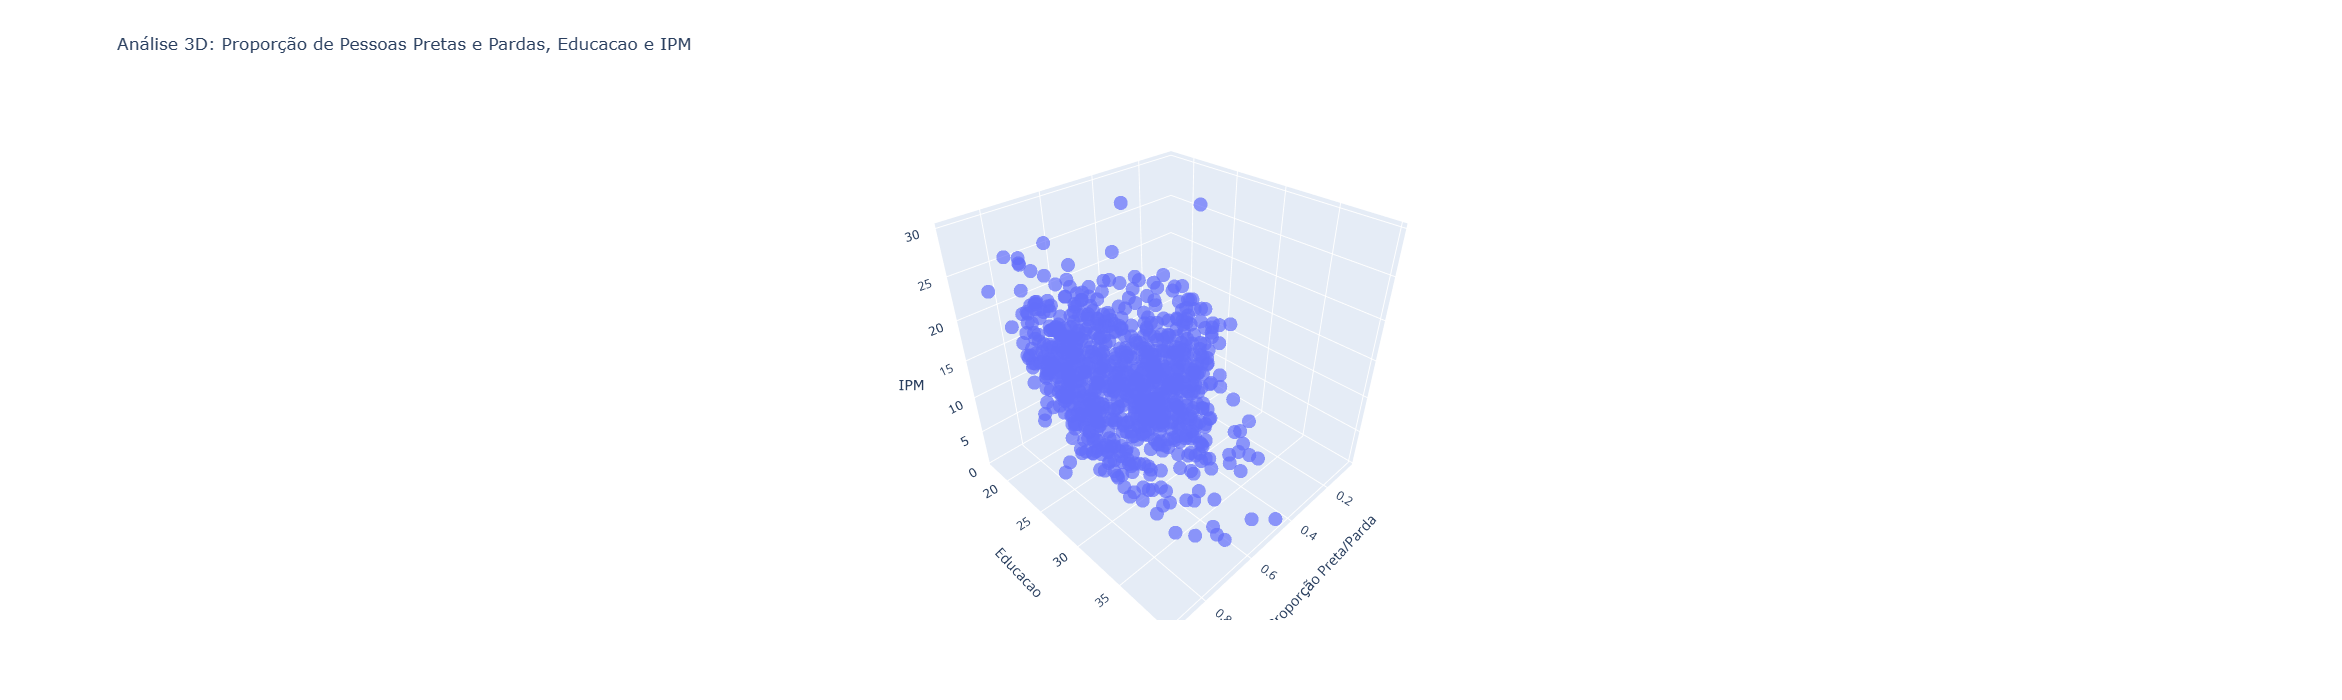

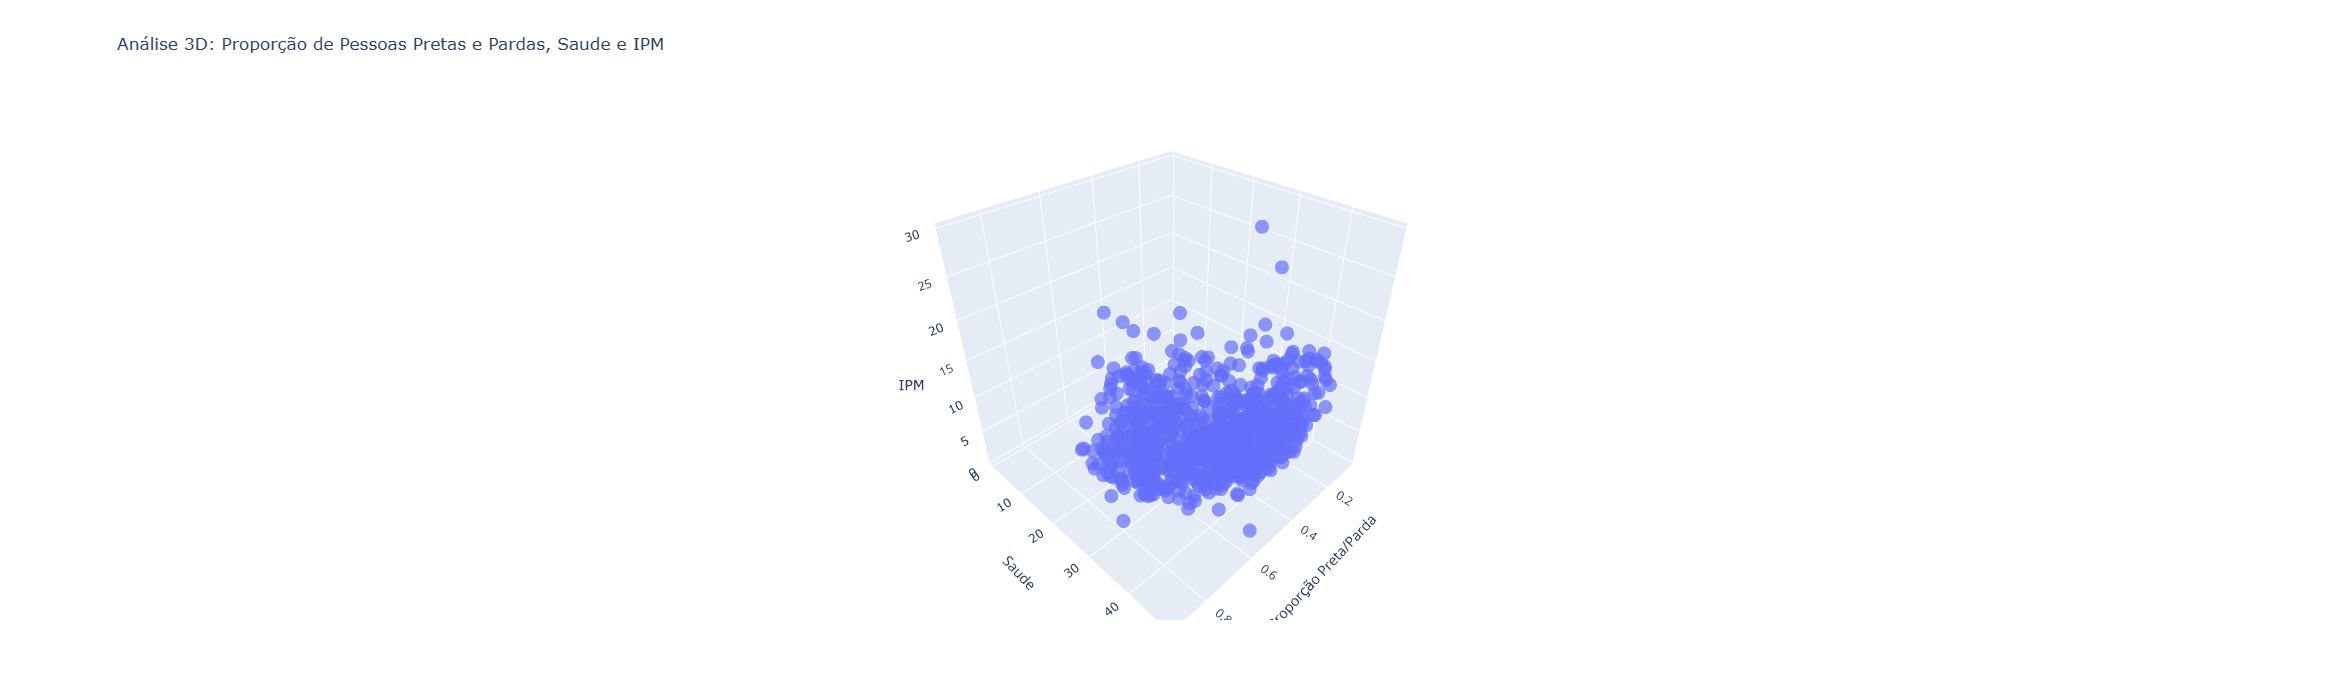

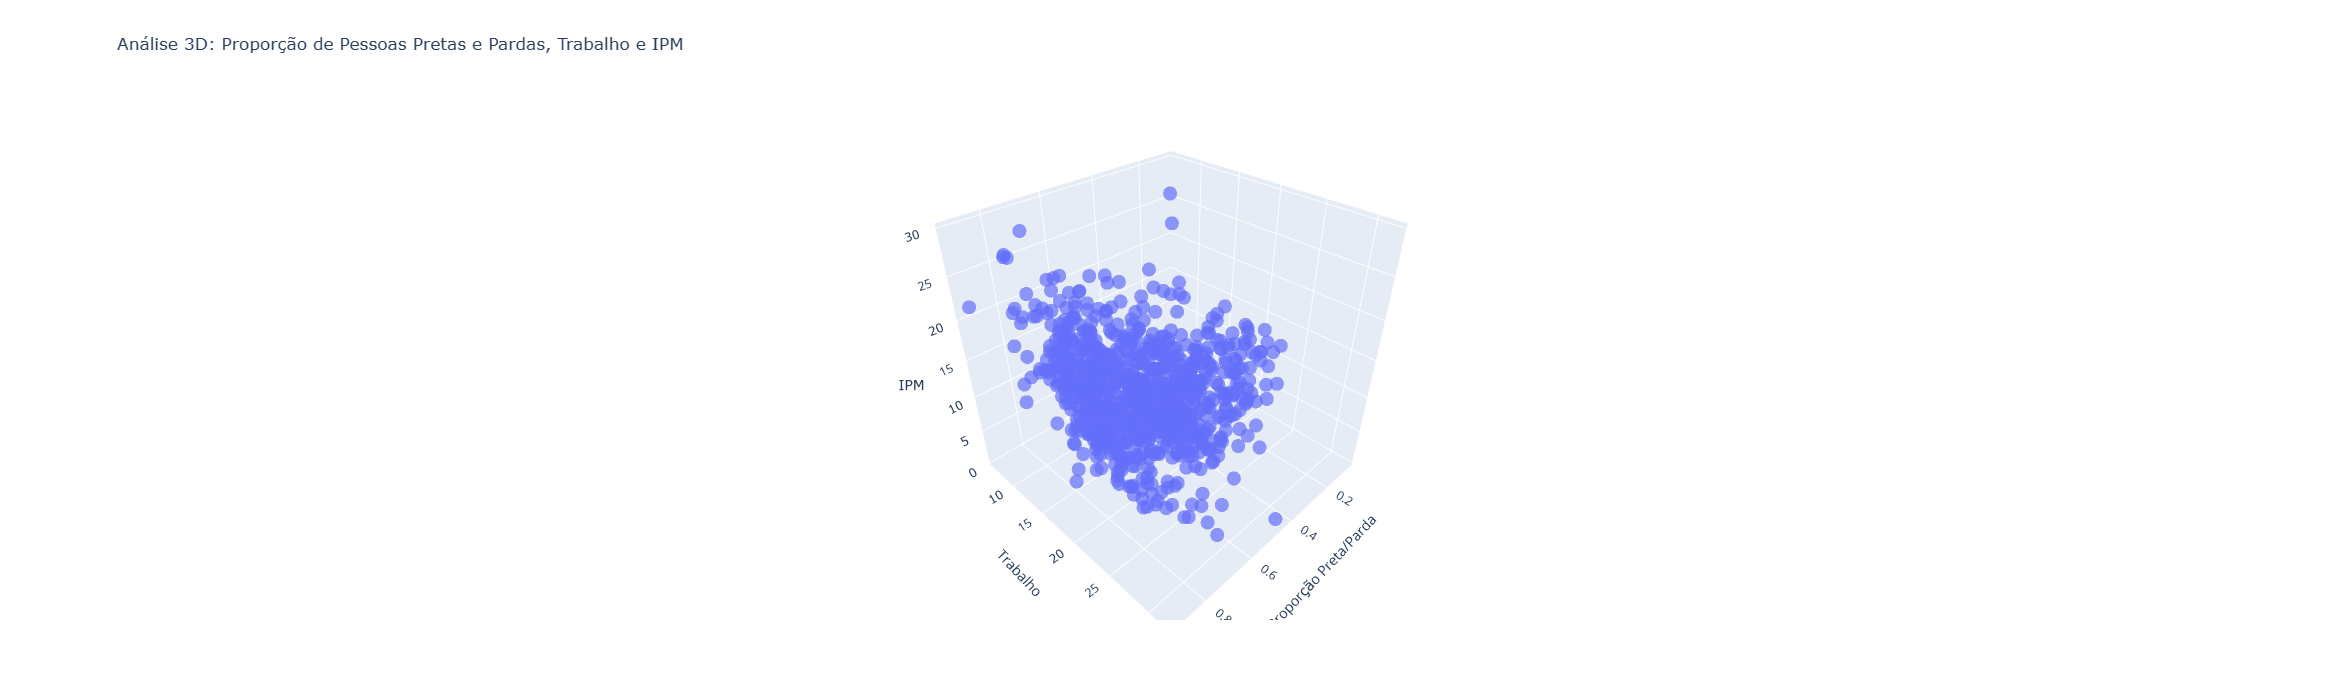

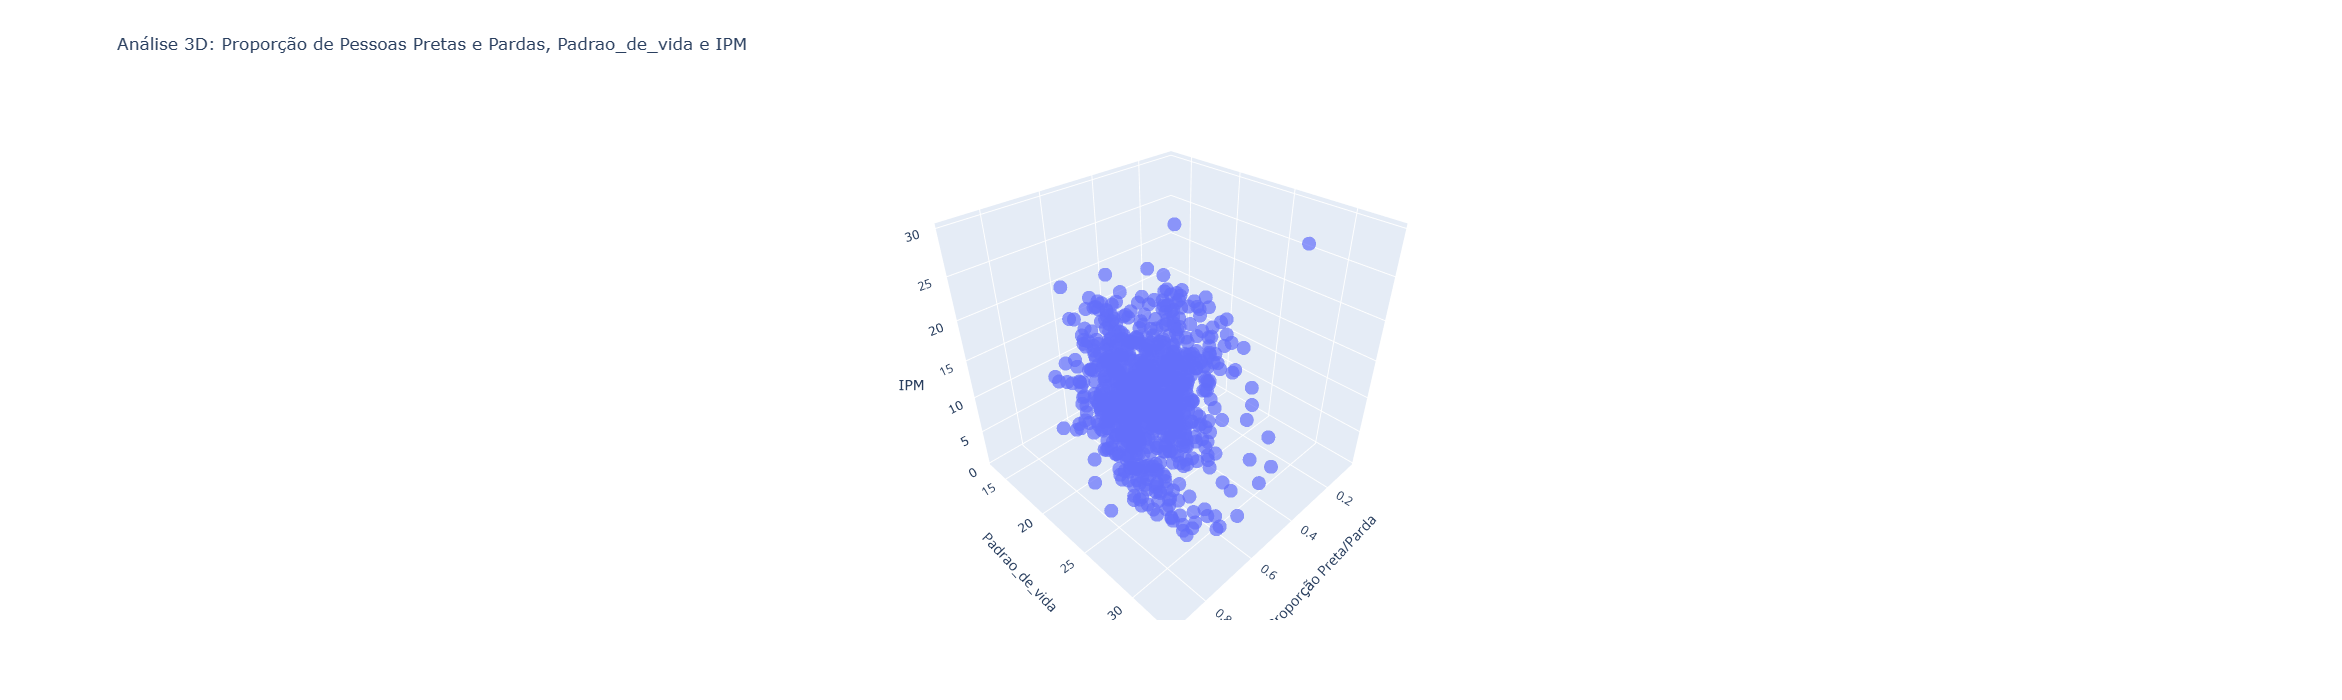

In [38]:
# Função para criar um gráfico 3D com base na métrica fornecida para o eixo Y
def create_3d_plot(metric):
    fig = px.scatter_3d(analise_por_raca, x='preta_parda', z='IPM', y=metric,
                        hover_name='nom_mun', hover_data=['preta_parda', metric, 'IPM'],
                        title=f"Análise 3D: Proporção de Pessoas Pretas e Pardas, {metric.capitalize()} e IPM",
                        labels={'preta_parda': 'Proporção Preta/Parda', metric: metric.capitalize(), 'IPM': 'IPM'},
                        opacity=0.7, width=900, height=700)
    return fig

# Criando os quatro gráficos
metrics = ["educacao", "saude", "trabalho", "padrao_de_vida"]
plots = [create_3d_plot(metric) for metric in metrics]


for plot in plots:
    plot.show()





In [39]:
# Instanciar o StandardScaler
scaler = StandardScaler()

# 1. Padronizar as colunas "IPM", "preta_parda" e "educacao"
data_to_cluster_multi = analise_por_raca[['IPM', 'preta_parda', 'educacao']].copy()
data_to_cluster_multi['IPM'] = data_to_cluster_multi['IPM'] * 100  # Ajustando o peso do IPM
data_scaled_multi = scaler.fit_transform(data_to_cluster_multi)

# 2. Aplicar o algoritmo K-means com k = 3
kmeans_multi = KMeans(n_clusters=3, random_state=42)
clusters_multi = kmeans_multi.fit_predict(data_scaled_multi)

# 3. Adicionar os rótulos dos clusters ao dataframe original
analise_por_raca['cluster_multi'] = clusters_multi

# 4. Analisar os resultados: médias das colunas consideradas para cada cluster
cluster_summary_multi = analise_por_raca.groupby('cluster_multi')[['IPM', 'preta_parda', 'educacao']].mean().reset_index()

cluster_summary_multi



C:\Users\lopes\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\lopes\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.



cluster_multi        IPM  preta_parda   educacao
0              0  16.381879     0.704161  23.629990
1              1   8.374576     0.357611  23.723159
2              2   4.328893     0.547414  28.453762

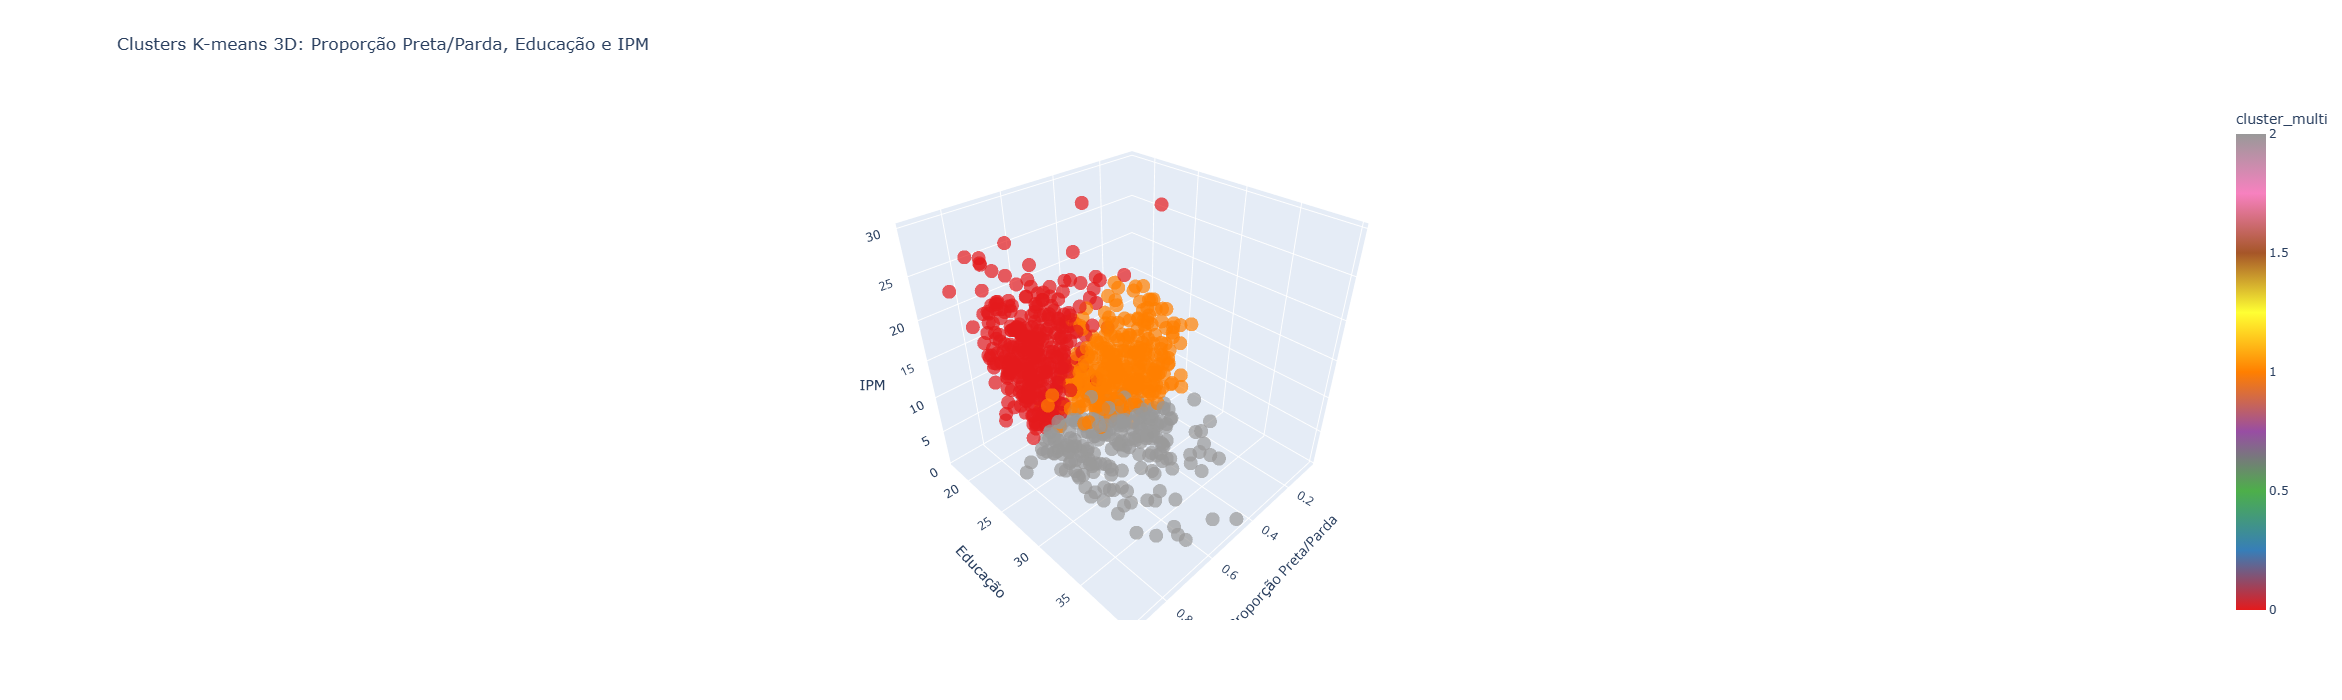

In [40]:
# Criando o gráfico 3D para visualizar os clusters
fig_clusters_educacao = px.scatter_3d(analise_por_raca, x='preta_parda', y='educacao', z='IPM',
                             color='cluster_multi', 
                             hover_name='nom_mun', 
                             hover_data=['preta_parda', 'educacao', 'IPM'],
                             title="Clusters K-means 3D: Proporção Preta/Parda, Educação e IPM",
                             labels={'preta_parda': 'Proporção Preta/Parda', 'educacao': 'Educação', 'IPM': 'IPM'},
                             color_continuous_scale=px.colors.qualitative.Set1,
                             opacity=0.7, width=900, height=700)

fig_clusters_educacao.write_html("Proporção Preta_Parda, Educação e IPM.html")
fig_clusters_educacao.show()



In [41]:
from matplotlib.colors import ListedColormap

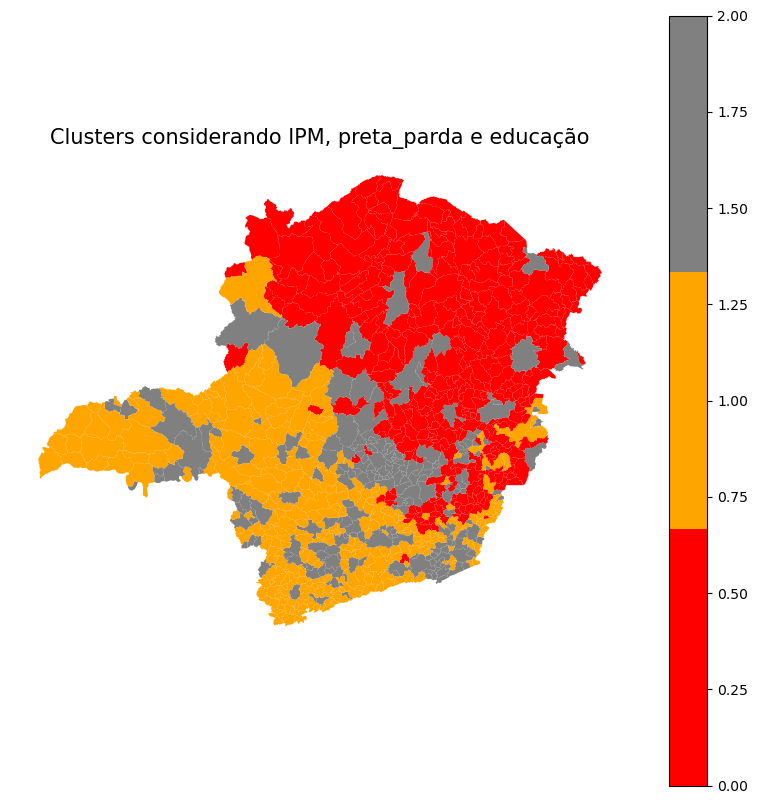

In [42]:

# 4. Carregar o arquivo shapefile de Minas Gerais
mg_shape = gpd.read_file(r"C:\Users\lopes\OneDrive\Área de Trabalho\Desafio\Shapefiles\BR_Municipios_2022.shp")

# Converter a coluna do código do município para o tipo int
mg_shape["CD_MUN"] = mg_shape["CD_MUN"].astype(int)

# 5. Realizar uma junção entre o shapefile e o dataframe analise_por_raca
merged_data = mg_shape.merge(analise_por_raca, left_on="CD_MUN", right_on="cod_mun", how="left")

# Definindo a paleta de cores
colors_map = {0: 'red', 1: 'orange', 2: 'gray'}

# Plotando o mapa
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
merged_data.plot(column='cluster_multi', ax=ax, legend=True, cmap=ListedColormap([colors_map[i] for i in range(3)]))
ax.set_title("Clusters considerando IPM, preta_parda e educação", fontdict={'fontsize': '15', 'fontweight' : '3'})
ax.axis('off')

# Ajustando a legenda
leg = ax.get_legend()
if leg:
    for lbl, txt in zip(leg.get_texts(), ["Cluster 0", "Cluster 1", "Cluster 2"]):
        lbl.set_text(txt)

# Salvar a figura antes de chamar plt.show()
plt.savefig("Clusters_considerando_IPM_preta_parda_e_educacao.png")    

# Exibir o mapa
plt.show()


In [43]:
# Criando as tabelas com a lista de municípios para cada cluster
cluster_0_municipios = analise_por_raca[analise_por_raca['cluster_multi'] == 0][['nom_mun']]
cluster_1_municipios = analise_por_raca[analise_por_raca['cluster_multi'] == 1][['nom_mun']]
cluster_2_municipios = analise_por_raca[analise_por_raca['cluster_multi'] == 2][['nom_mun']]

cluster_0_municipios.head(), cluster_1_municipios.head(), cluster_2_municipios.head()


(          nom_mun
 2      Abre Campo
 3         Acaiaca
 4         Açucena
 5        Água Boa
 8  Águas Formosas,
                 nom_mun
 0   Abadia dos Dourados
 1                Abaeté
 6         Água Comprida
 7               Aguanil
 11             Aiuruoca,
          nom_mun
 10       Aimorés
 14  Além Paraíba
 15       Alfenas
 21  Alto Caparaó
 43         Araxá)

In [44]:
# Salvando as listas de municípios para cada cluster em arquivos CSV
cluster_0_municipios.to_csv('cluster_0_municipios_educacao.csv', index=False)
cluster_1_municipios.to_csv('cluster_1_municipios_educacao.csv', index=False)
cluster_2_municipios.to_csv('cluster_2_municipios_educacao.csv', index=False)




In [45]:
# 1. Selecionar as colunas "saude" e "IPM", e ajustar a escala do IPM
data_to_cluster_saude = analise_por_raca[['saude', 'IPM']].copy()
data_to_cluster_saude['IPM'] = data_to_cluster_saude['IPM'] * 100  # Ajustando o peso do IPM

# 2. Padronizar as colunas
data_scaled_saude = StandardScaler().fit_transform(data_to_cluster_saude)

# 3. Aplicar o algoritmo K-means com k = 3
clusters_saude = KMeans(n_clusters=3, random_state=42).fit_predict(data_scaled_saude)

# 4. Adicionar os rótulos dos clusters ao dataframe original
analise_por_raca['cluster_saude'] = clusters_saude

# 5. Analisar os resultados: média das colunas consideradas para cada cluster
cluster_summary_saude = analise_por_raca.groupby('cluster_saude')[['saude', 'IPM']].mean().reset_index()

cluster_summary_saude




C:\Users\lopes\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\lopes\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.



cluster_saude      saude        IPM
0              0  39.089226   7.757851
1              1  26.648383   4.441275
2              2  37.614723  17.641033

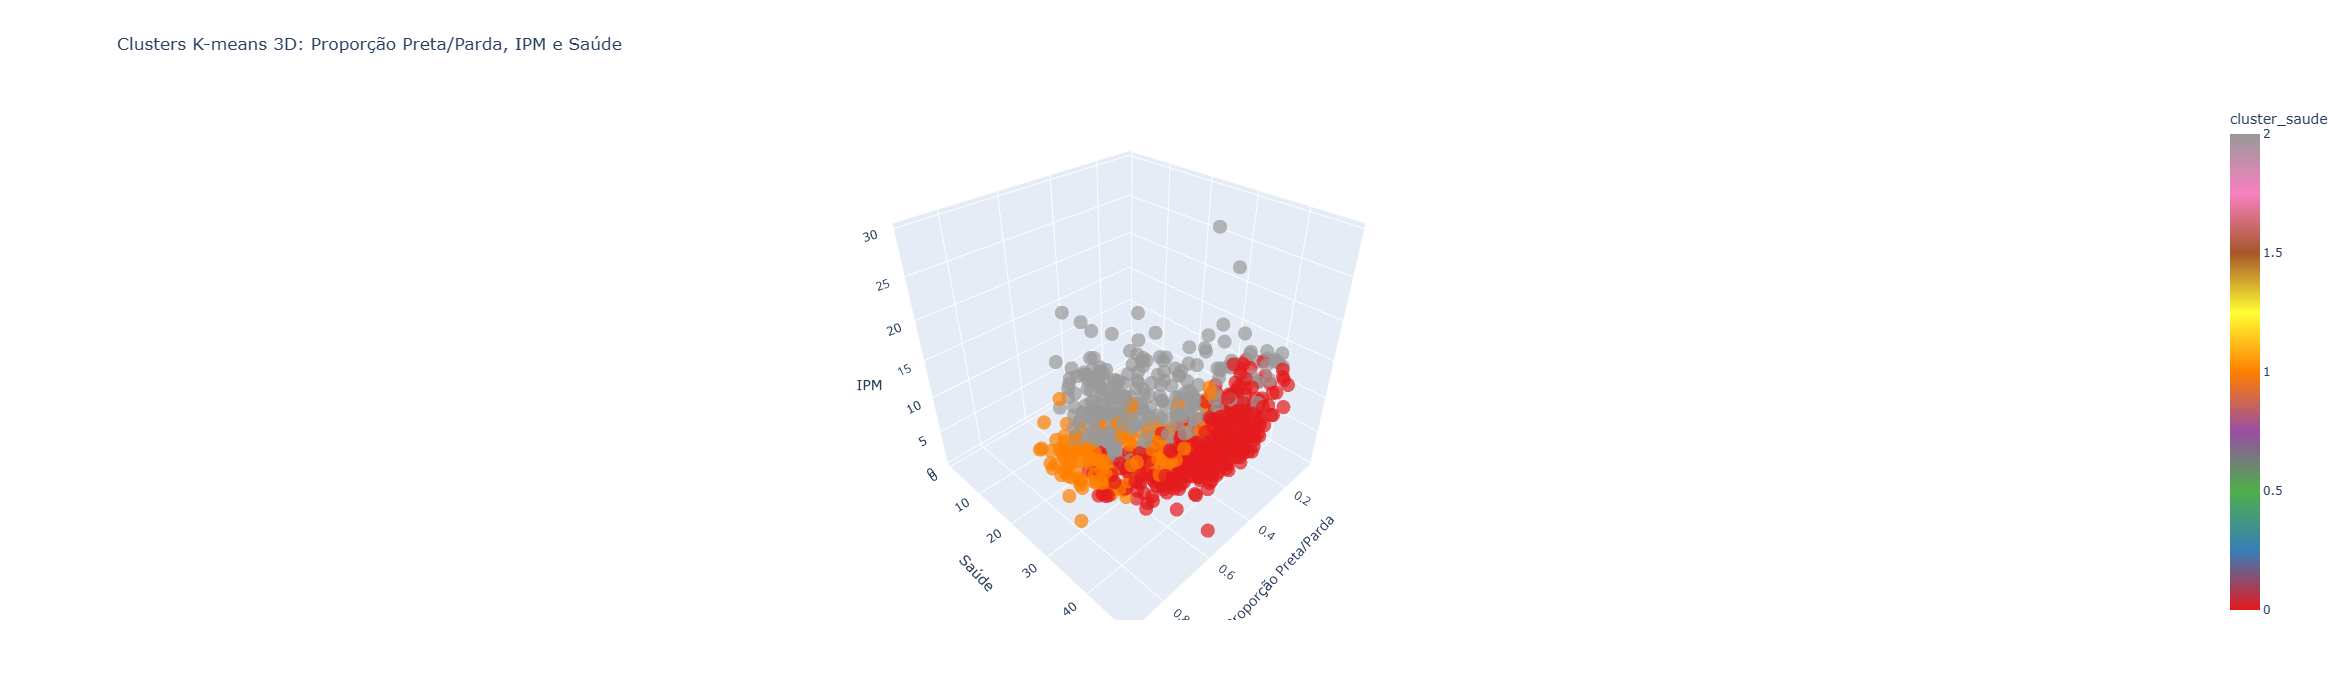

In [46]:
# Criando o gráfico 3D para visualizar os clusters baseados na coluna "saude"
fig_clusters_saude = px.scatter_3d(analise_por_raca, x='preta_parda', y='saude', z='IPM',
                                   color='cluster_saude', 
                                   hover_name='nom_mun', 
                                   hover_data=['preta_parda', 'IPM', 'saude'],
                                   title="Clusters K-means 3D: Proporção Preta/Parda, IPM e Saúde",
                                   labels={'preta_parda': 'Proporção Preta/Parda', 'IPM': 'IPM', 'saude': 'Saúde'},
                                   color_continuous_scale=px.colors.qualitative.Set1,
                                   opacity=0.7, width=900, height=700)

fig_clusters_saude.write_html("Proporção Preta_Parda, IPM e Saúde.html")
fig_clusters_saude.show()



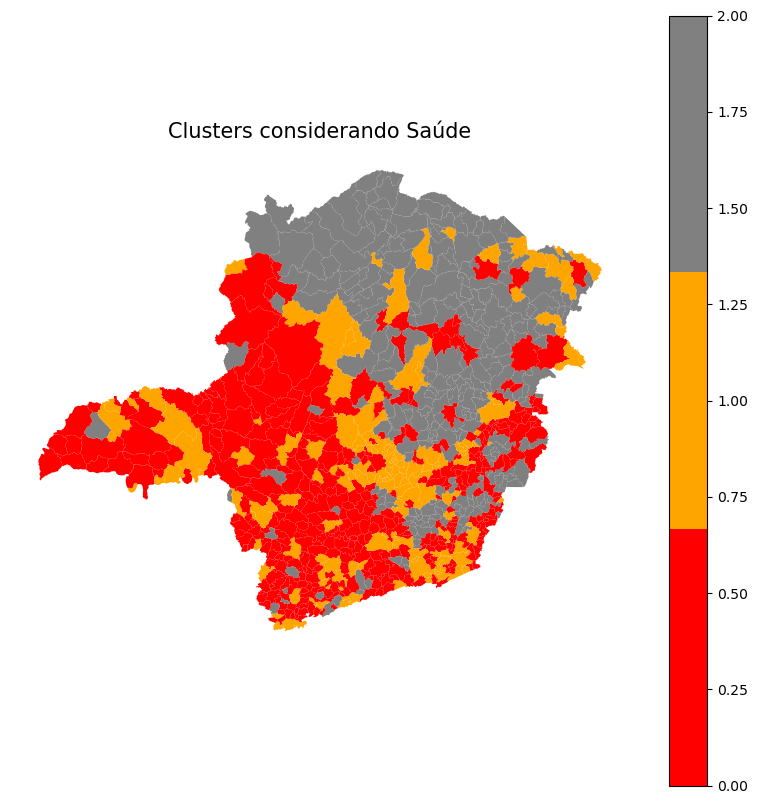

In [47]:
# Supondo que 'nom_mun' é uma coluna comum nos dois DataFrames
merged_data = merged_data.merge(analise_por_raca[['nom_mun', 'cluster_saude']], on='nom_mun')

# Definindo a paleta de cores
colors_map = {0: 'red', 1: 'orange', 2: 'gray'}

# Plotando o mapa
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
merged_data.plot(column='cluster_saude', ax=ax, legend=True, cmap=ListedColormap([colors_map[i] for i in range(3)]))
ax.set_title("Clusters considerando Saúde", fontdict={'fontsize': '15', 'fontweight' : '3'})
ax.axis('off')

# Ajustando a legenda
leg = ax.get_legend()
if leg:
    for lbl, txt in zip(leg.get_texts(), ["Cluster 0", "Cluster 1", "Cluster 2"]):
        lbl.set_text(txt)

# Salvar a figura antes de chamar plt.show()
plt.savefig("Clusters_considerando_Saude.png")

# Exibir o mapa
plt.show()


In [48]:
# Criando as tabelas com a lista de municípios para cada cluster baseado na coluna "saude"
cluster_saude_0_municipios = analise_por_raca[analise_por_raca['cluster_saude'] == 0][['nom_mun']]
cluster_saude_1_municipios = analise_por_raca[analise_por_raca['cluster_saude'] == 1][['nom_mun']]
cluster_saude_2_municipios = analise_por_raca[analise_por_raca['cluster_saude'] == 2][['nom_mun']]

# Salvando as listas de municípios para cada cluster em arquivos CSV
cluster_saude_0_municipios.to_csv('cluster_saude_0_municipios.csv', index=False)
cluster_saude_1_municipios.to_csv('cluster_saude_1_municipios.csv', index=False)
cluster_saude_2_municipios.to_csv('cluster_saude_2_municipios.csv', index=False)


In [49]:
# 1. Selecionar as colunas "trabalho" e "IPM", e ajustar a escala do IPM
data_to_cluster_trabalho = analise_por_raca[['trabalho', 'IPM']].copy()
data_to_cluster_trabalho['IPM'] = data_to_cluster_trabalho['IPM'] * 100  # Ajustando o peso do IPM

# 2. Padronizar as colunas
data_scaled_trabalho = StandardScaler().fit_transform(data_to_cluster_trabalho)

# 3. Aplicar o algoritmo K-means com k = 3
clusters_trabalho = KMeans(n_clusters=3, random_state=42).fit_predict(data_scaled_trabalho)

# 4. Adicionar os rótulos dos clusters ao dataframe original
analise_por_raca['cluster_trabalho'] = clusters_trabalho

# 5. Analisar os resultados: médias das colunas consideradas para cada cluster
cluster_summary_trabalho = analise_por_raca.groupby('cluster_trabalho')[['trabalho', 'IPM']].mean().reset_index()

cluster_summary_trabalho


C:\Users\lopes\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\lopes\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.



cluster_trabalho   trabalho        IPM
0                 0  15.286244   7.459561
1                 1  20.417450   6.178446
2                 2  15.514089  17.759902

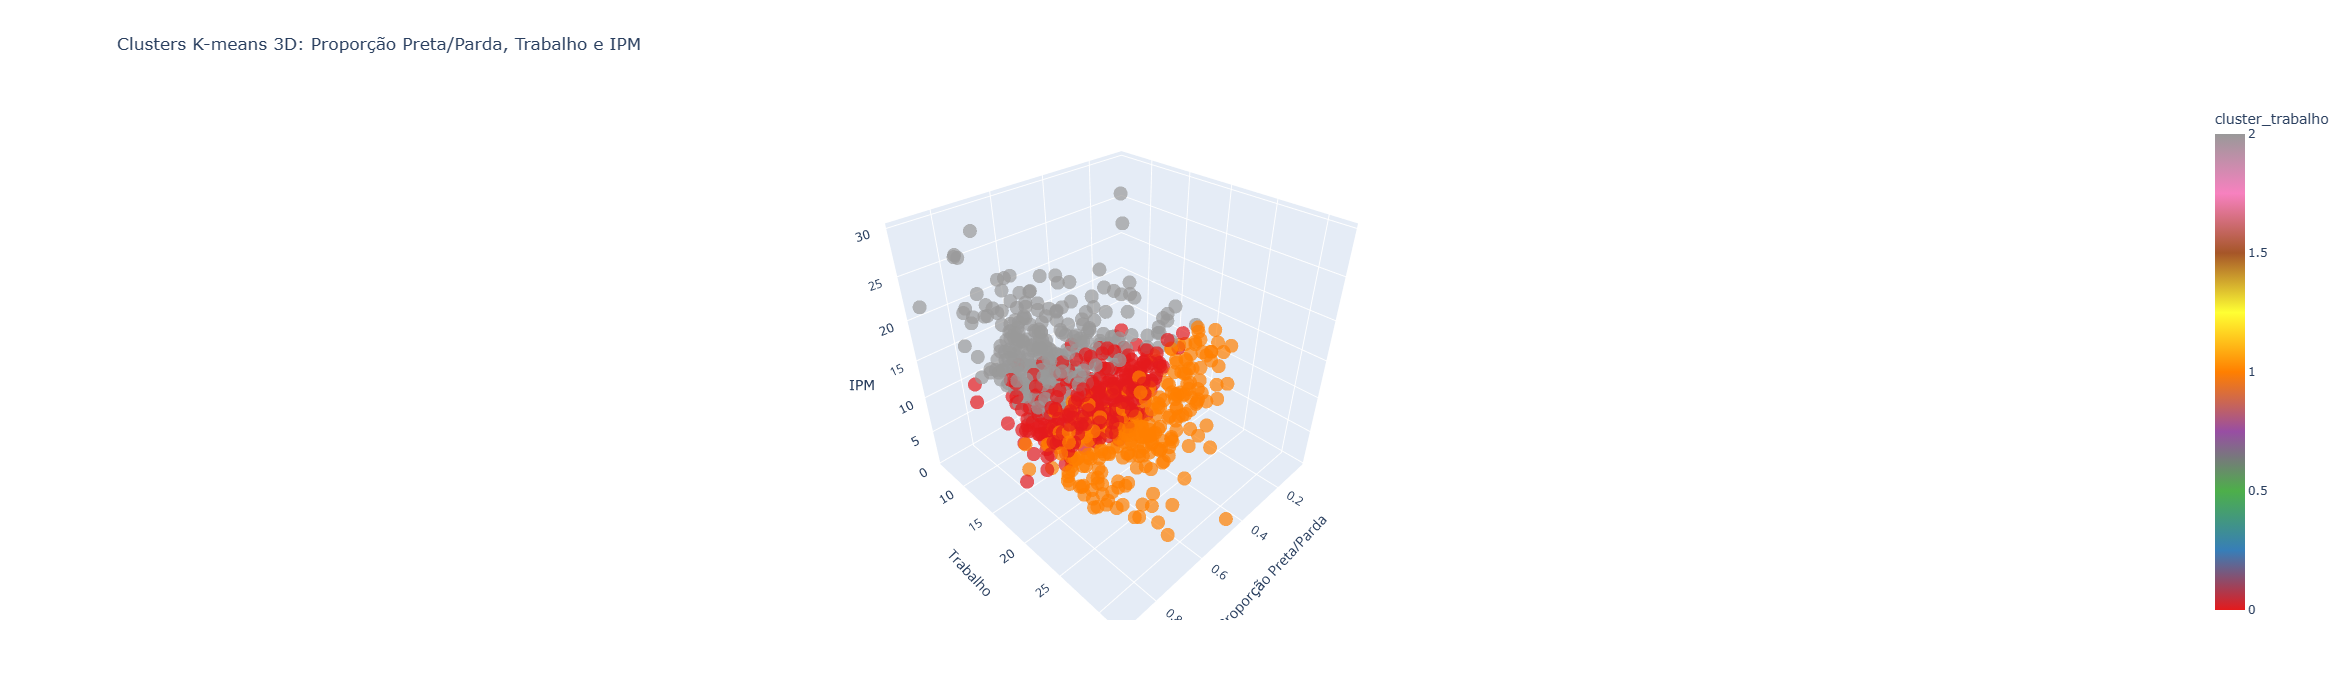

In [50]:
# Criando o gráfico 3D para visualizar os clusters baseados na coluna "trabalho"
fig_clusters_trabalho = px.scatter_3d(analise_por_raca, x='preta_parda', y='trabalho', z='IPM',
                                      color='cluster_trabalho', 
                                      hover_name='nom_mun', 
                                      hover_data=['preta_parda', 'trabalho', 'IPM'],
                                      title="Clusters K-means 3D: Proporção Preta/Parda, Trabalho e IPM",
                                      labels={'preta_parda': 'Proporção Preta/Parda', 'trabalho': 'Trabalho', 'IPM': 'IPM'},
                                      color_continuous_scale=px.colors.qualitative.Set1,
                                      opacity=0.7, width=900, height=700)

fig_clusters_trabalho.write_html("Proporção Preta_Parda, Trabalho e IPM.html")
fig_clusters_trabalho.show()

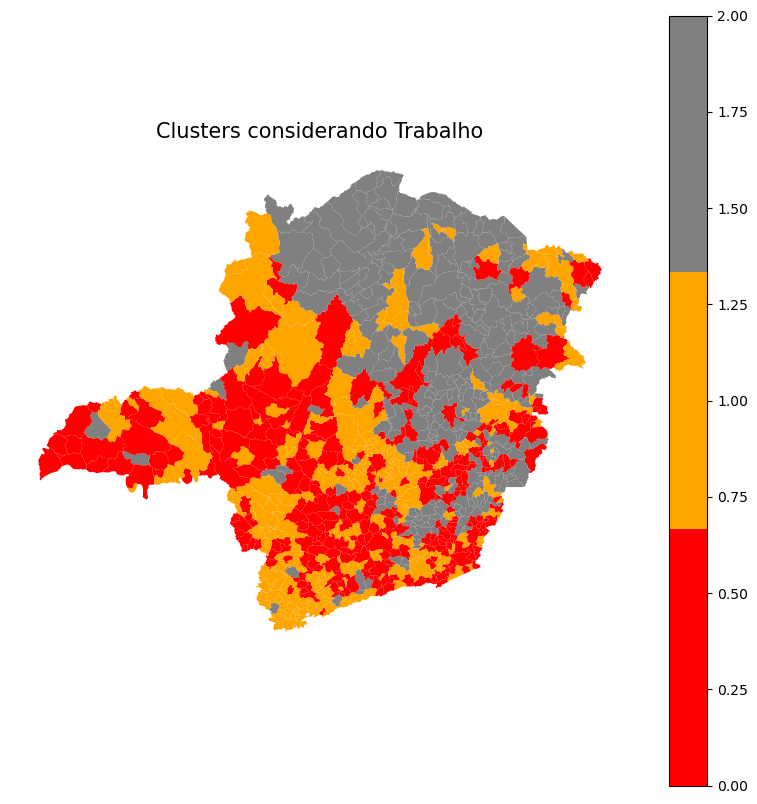

In [51]:
# Supondo que 'nom_mun' é uma coluna comum nos dois DataFrames
merged_data = merged_data.merge(analise_por_raca[['nom_mun', 'cluster_trabalho']], on='nom_mun')

# Definindo a paleta de cores
colors_map = {0: 'red', 1: 'orange', 2: 'gray'}

# Plotando o mapa
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
merged_data.plot(column='cluster_trabalho', ax=ax, legend=True, cmap=ListedColormap([colors_map[i] for i in range(3)]))
ax.set_title("Clusters considerando Trabalho", fontdict={'fontsize': '15', 'fontweight' : '3'})
ax.axis('off')

# Ajustando a legenda
leg = ax.get_legend()
if leg:
    for lbl, txt in zip(leg.get_texts(), ["Cluster 0", "Cluster 1", "Cluster 2"]):
        lbl.set_text(txt)

# Salvar a figura antes de chamar plt.show()
plt.savefig("Clusters_considerando_trabalho.png")

# Exibir o mapa
plt.show()



In [52]:
# Criando as tabelas com a lista de municípios para cada cluster baseado na coluna "trabalho"
cluster_trabalho_0_municipios = analise_por_raca[analise_por_raca['cluster_trabalho'] == 0][['nom_mun']]
cluster_trabalho_1_municipios = analise_por_raca[analise_por_raca['cluster_trabalho'] == 1][['nom_mun']]
cluster_trabalho_2_municipios = analise_por_raca[analise_por_raca['cluster_trabalho'] == 2][['nom_mun']]

# Salvando as listas de municípios para cada cluster em arquivos CSV
cluster_trabalho_0_municipios.to_csv('cluster_trabalho_0_municipios.csv', index=False)
cluster_trabalho_1_municipios.to_csv('cluster_trabalho_1_municipios.csv', index=False)
cluster_trabalho_2_municipios.to_csv('cluster_trabalho_2_municipios.csv', index=False)


In [53]:
# 1. Selecionar as colunas "padrao_de_vida" e "IPM", e ajustar a escala do IPM
data_to_cluster_vida = analise_por_raca[['padrao_de_vida', 'IPM']].copy()
data_to_cluster_vida['IPM'] = data_to_cluster_vida['IPM'] * 100  # Ajustando o peso do IPM

# 2. Padronizar as colunas
data_scaled_vida = StandardScaler().fit_transform(data_to_cluster_vida)

# 3. Aplicar o algoritmo K-means com k = 3
clusters_vida = KMeans(n_clusters=3, random_state=42).fit_predict(data_scaled_vida)

# 4. Adicionar os rótulos dos clusters ao dataframe original
analise_por_raca['cluster_vida'] = clusters_vida

# 5. Analisar os resultados: médias das colunas consideradas para cada cluster
cluster_summary_vida = analise_por_raca.groupby('cluster_vida')[['padrao_de_vida', 'IPM']].mean().reset_index()

cluster_summary_vida


C:\Users\lopes\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\lopes\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.



cluster_vida  padrao_de_vida        IPM
0             0       19.375009   8.281915
1             1       24.151790  17.990263
2             2       25.092041   5.083246

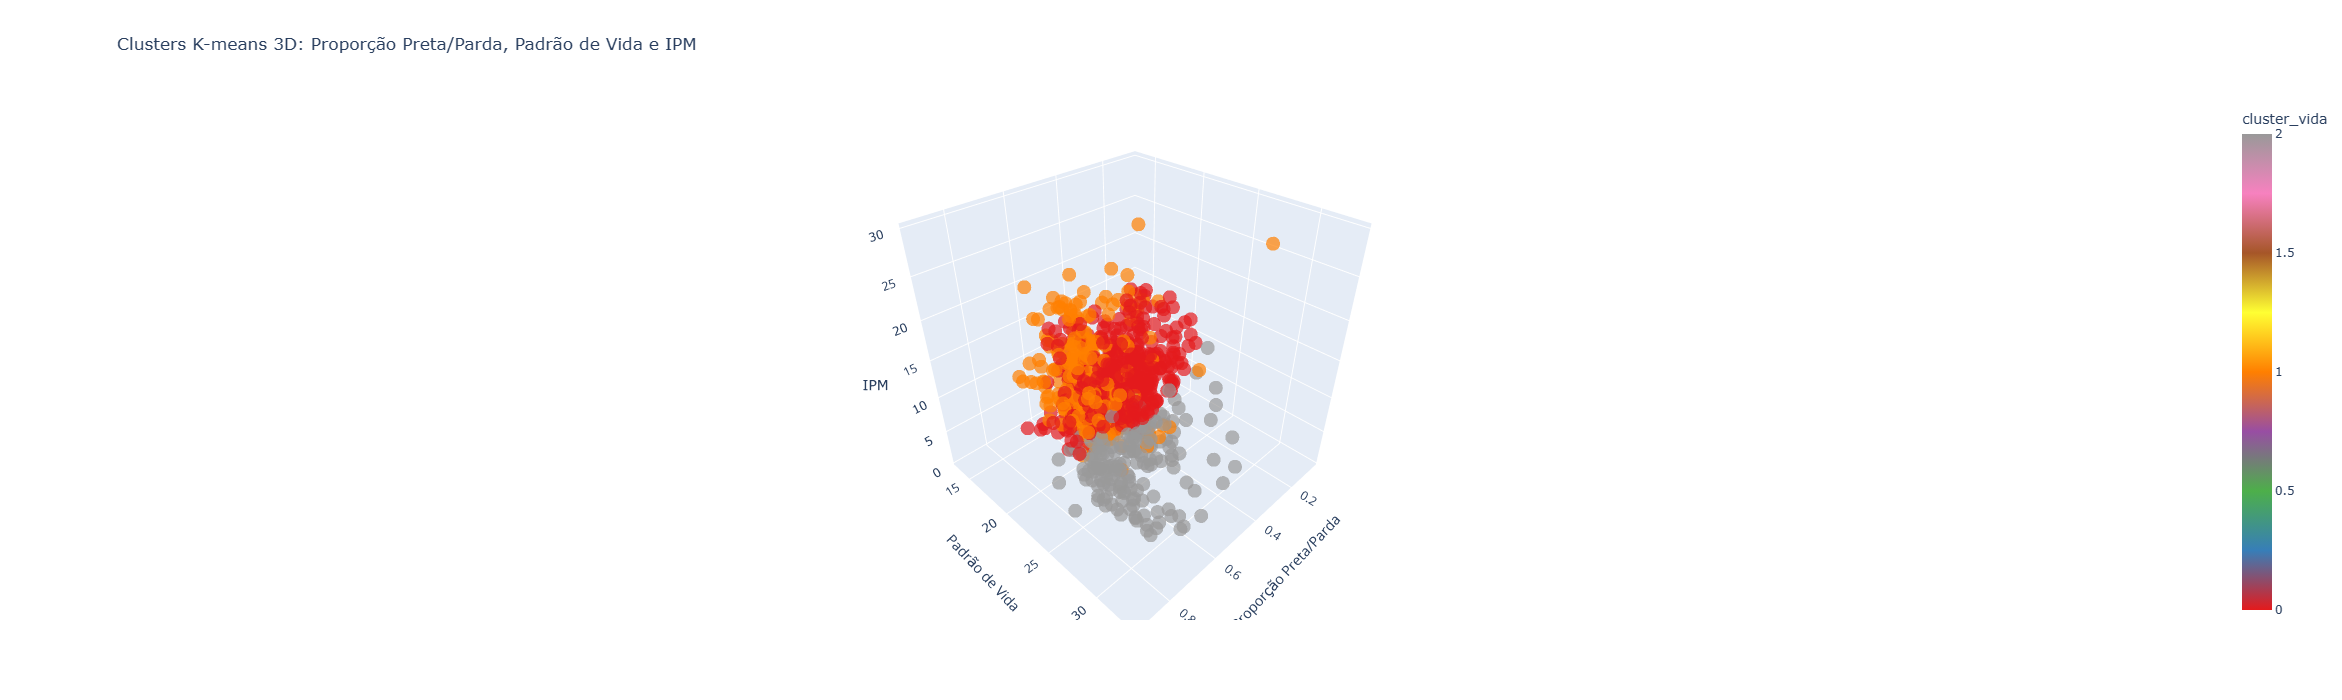

In [54]:
# Criando o gráfico 3D para visualizar os clusters baseados na coluna "padrao_de_vida"
fig_clusters_vida = px.scatter_3d(analise_por_raca, x='preta_parda', y='padrao_de_vida', z='IPM',
                                  color='cluster_vida', 
                                  hover_name='nom_mun', 
                                  hover_data=['preta_parda', 'padrao_de_vida', 'IPM'],
                                  title="Clusters K-means 3D: Proporção Preta/Parda, Padrão de Vida e IPM",
                                  labels={'preta_parda': 'Proporção Preta/Parda', 'padrao_de_vida': 'Padrão de Vida', 'IPM': 'IPM'},
                                  color_continuous_scale=px.colors.qualitative.Set1,
                                  opacity=0.7, width=900, height=700)

fig_clusters_vida.write_html("Proporção Preta_Parda, Padrão de Vida e IPM.html")
fig_clusters_vida.show()

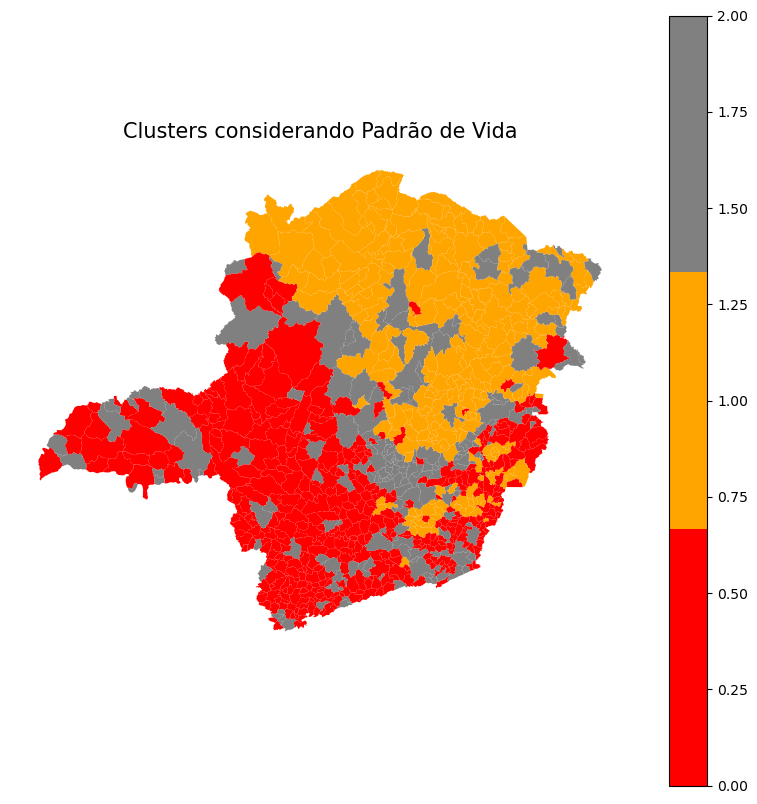

In [55]:
# Supondo que 'nom_mun' é uma coluna comum nos dois DataFrames
merged_data = merged_data.merge(analise_por_raca[['nom_mun', 'cluster_vida']], on='nom_mun')

# Definindo a paleta de cores
colors_map = {0: 'red', 1: 'orange', 2: 'gray'}

# Plotando o mapa
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
merged_data.plot(column='cluster_vida', ax=ax, legend=True, cmap=ListedColormap([colors_map[i] for i in range(3)]))
ax.set_title("Clusters considerando Padrão de Vida", fontdict={'fontsize': '15', 'fontweight' : '3'})
ax.axis('off')

# Ajustando a legenda
leg = ax.get_legend()
if leg:
    for lbl, txt in zip(leg.get_texts(), ["Cluster 0", "Cluster 1", "Cluster 2"]):
        lbl.set_text(txt)

# Salvar a figura antes de chamar plt.show()
plt.savefig("Cluster_considerando_Padrao_de_Vida.png")

# Exibir o mapa
plt.show()



In [56]:
# Criando as tabelas com a lista de municípios para cada cluster baseado na coluna "padrao_de_vida"
cluster_vida_0_municipios = analise_por_raca[analise_por_raca['cluster_vida'] == 0][['nom_mun']]
cluster_vida_1_municipios = analise_por_raca[analise_por_raca['cluster_vida'] == 1][['nom_mun']]
cluster_vida_2_municipios = analise_por_raca[analise_por_raca['cluster_vida'] == 2][['nom_mun']]

# Salvando as listas de municípios para cada cluster em arquivos CSV
cluster_vida_0_municipios.to_csv('cluster_vida_0_municipios.csv', index=False)
cluster_vida_1_municipios.to_csv('cluster_vida_1_municipios.csv', index=False)
cluster_vida_2_municipios.to_csv('cluster_vida_2_municipios.csv', index=False)
